<h1 style="color:blue; font-size:36px;">Projet Machine Learning 4A</h1>

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time


In [34]:
energy=pd.read_csv('global-data-on-sustainable-energy.csv')

### <span style="color:blue">**I. Prétraitement des données** </span>

#### <span style="color:blue">**I.1 Suppression des NAN** </span>

#### Grace à la statistique "count", nous constatons que les variables n'ont pas toutes le meme nombre d'observations indinquant ainsi la présence de données manquantes

In [35]:
(energy.isna().sum()/energy.shape[0]*100).sort_values(ascending=False)

Renewables (% equivalent primary energy)                            58.563990
Financial flows to developing countries (US $)                      57.248561
Renewable-electricity-generating-capacity-per-capita                25.513839
Value_co2_emissions_kt_by_country                                   11.729241
gdp_growth                                                           8.687312
gdp_per_capita                                                       7.728145
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          5.672787
Renewable energy share in the total final energy consumption (%)     5.316525
Access to clean fuels for cooking                                    4.631406
Electricity from nuclear (TWh)                                       3.453001
Low-carbon electricity (% electricity)                               1.151000
Electricity from renewables (TWh)                                    0.575500
Electricity from fossil fuels (TWh)                             

##### Nous allons retirer les variables "Renewables", "Financial flows to developing countries" et "Renewable-electricity-generating-capacity-per-capita" en raison de leur taux de données manquantes, situé entre 25 et 60 %. Ensuite, nous éliminerons tous les individus ayant des valeurs non disponibles (NaN) pour les variables restantes. il nous reste ainsi 2868 individus avec 18 variables

In [36]:
energy.drop(['Renewable-electricity-generating-capacity-per-capita','Financial flows to developing countries (US $)','Renewables (% equivalent primary energy)'],axis=1,inplace=True)

In [37]:
energy.dropna(axis=0,inplace=True)
energy.shape

(2868, 18)

In [38]:
energy.iloc[:,14]=energy.iloc[:,14].str.replace(',','') #on remplace les virgule de la colonne Density par un espace
energy.iloc[:, 14] = pd.to_numeric(energy.iloc[:, 14], errors='coerce')

/tmp/ipykernel_10367/2884096525.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  energy.iloc[:, 14] = pd.to_numeric(energy.iloc[:, 14], errors='coerce')


#### <span style="color:blue">**I.2 Conversion des variables 'Year' et 'Entity'** </span>

In [39]:
energy['Year'] = energy['Year'].astype('category')
energy.rename(columns={energy.columns[14]: 'Density'}, inplace=True)#renommer la colonne Density pour faciliter l'accés à la variable
energy['Density']= pd.to_numeric(energy['Density'], errors='coerce')


In [40]:
# Regrouper les émissions de CO2 par pays
co2_by_country = energy.groupby('Entity')['Value_co2_emissions_kt_by_country'].sum().reset_index()

# Trier les pays par ordre décroissant en fonction des émissions de CO2
co2_by_country_sorted = co2_by_country.sort_values(by='Value_co2_emissions_kt_by_country', ascending=False)

# Afficher les résultats
print(co2_by_country_sorted)

                    Entity  Value_co2_emissions_kt_by_country
27                   China                       1.527328e+08
142          United States                       1.065908e+08
62                   India                       3.267958e+07
68                   Japan                       2.367469e+07
50                 Germany                       1.547289e+07
..                     ...                                ...
35                Djibouti                       2.520000e+03
145                Vanuatu                       2.460000e+03
114  Sao Tome and Principe                       1.860000e+03
71                Kiribati                       1.190000e+03
92                   Nauru                       5.300000e+02

[148 rows x 2 columns]


##### Les 5 pays les plus émetteurs de CO2 sont: La chine, les etats unis,l'inde, le japon et L'Allmagne

In [41]:
energy.drop(['Electricity from fossil fuels (TWh)'],axis=1,inplace=True)

### <span style="color:blue">**II. Analyse unidimentionnelle** </span>

#### <span style="color:blue">*II.1 Variables qualitatives* </span>

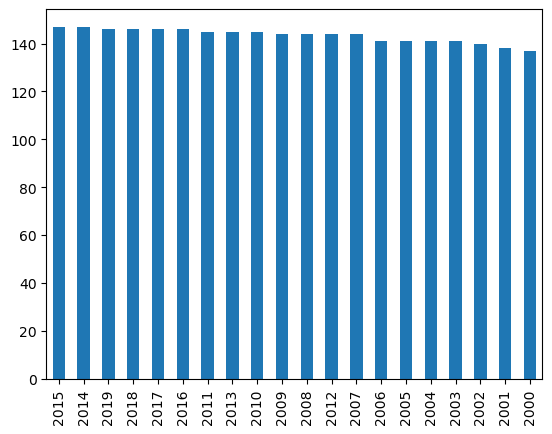

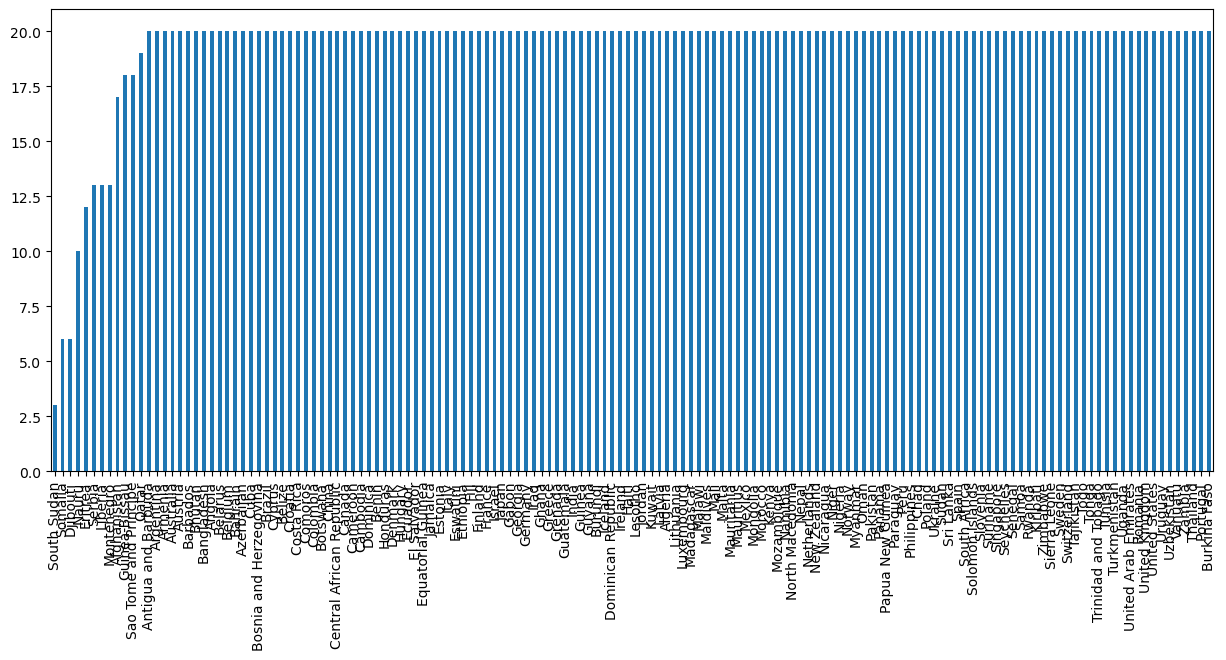

In [42]:
energy['Year'].value_counts().plot.bar()
plt.figure(figsize=(15,6))

energy['Entity'].value_counts().sort_values(ascending=True).plot.bar()
plt.tick_params(axis='x', rotation=90)

#### Nous observons des disparités dans le nombre d'observations pour chaque année. Les années les plus anciennes présentent moins d'observations que les plus récentes, ce qui peut indiquer une amélioration dans la collecte des données au fil du temps. De plus, il est important de noter que nous n'avons pas le même nombre d'observations pour chaque pays. Certains pays, comme le South Sudan, ont significativement moins d'observations par rapport aux autres.

#### <span style="color:blue">*II.2 Variables quantitatives* </span>

In [43]:
energyQuant=energy.iloc[:,2:] #On extrait que les variables quantitatives

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Access to electricity (% of population)'),
  Text(1, 0, 'Access to clean fuels for cooking'),
  Text(2, 0, 'Renewable energy share in the total final energy consumption (%)'),
  Text(3, 0, 'Electricity from nuclear (TWh)'),
  Text(4, 0, 'Electricity from renewables (TWh)'),
  Text(5, 0, 'Low-carbon electricity (% electricity)'),
  Text(6, 0, 'Primary energy consumption per capita (kWh/person)'),
  Text(7, 0, 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)'),
  Text(8, 0, 'Value_co2_emissions_kt_by_country'),
  Text(9, 0, 'gdp_growth'),
  Text(10, 0, 'gdp_per_capita'),
  Text(11, 0, 'Density'),
  Text(12, 0, 'Land Area(Km2)'),
  Text(13, 0, 'Latitude'),
  Text(14, 0, 'Longitude')])

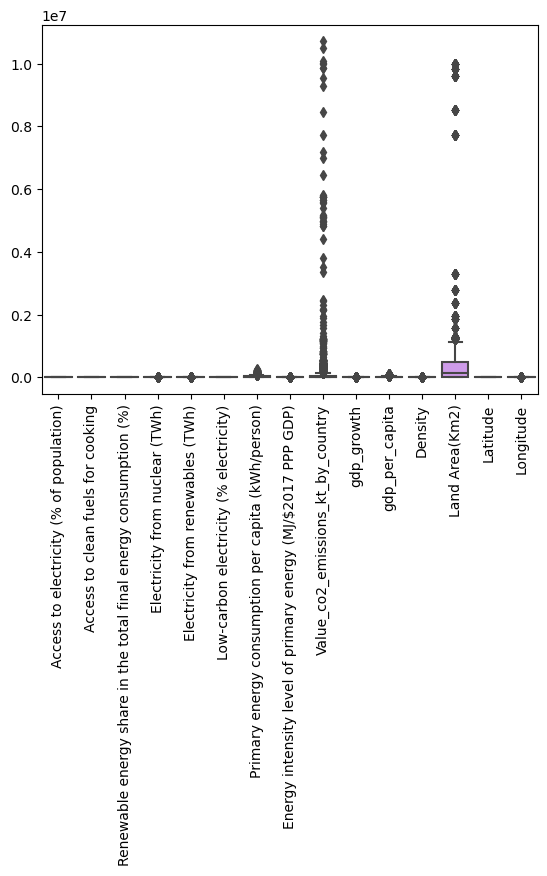

In [44]:
sns.boxplot(energyQuant)
plt.xticks(rotation=90)

#### Nous notons que nos variables présentent non seulement des unités de mesure variées, mais aussi des échelles différentes. Certaines variables ont une importance relative plus élevée que d'autres. Afin d'homogénéiser nos données on va les centrer et les reduire

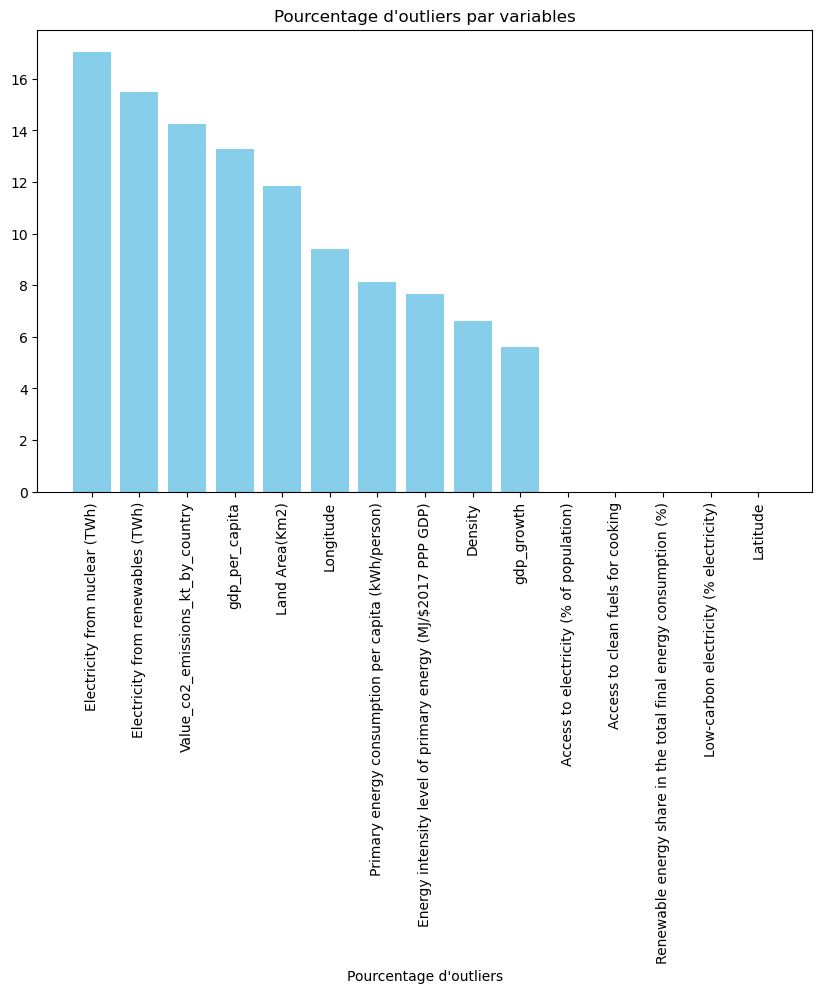

In [45]:

def percent_outliers(data): #renvoie
    percent_outliers_list = []
    for i in range(data.shape[1]): 
            q1 = np.percentile(data.iloc[:, i], 25)
            q3 = np.percentile(data.iloc[:, i], 75)
            iqr = q3 - q1
            bornes_inf = q1 - 1.5 * iqr
            bornes_sup = q3 + 1.5 * iqr
            outliers = data.iloc[:, i][(data.iloc[:, i] < bornes_inf) | (data.iloc[:, i] > bornes_sup)]
            percent_outliers = 100 * len(outliers) / len(data.iloc[:, i])
            percent_outliers_list.append((data.columns[i], percent_outliers))
    return percent_outliers_list

pourcentages_outliers = percent_outliers(energyQuant)

# Tri de la liste par ordre croissant en fonction du pourcentage d'outliers
pourcentages_outliers_tries = sorted(pourcentages_outliers, key=lambda x: x[1],reverse=True)


# Séparation des colonnes et des pourcentages
colonnes = [colonne for colonne, _ in pourcentages_outliers_tries]
pourcentages = [pourcentage for _, pourcentage in pourcentages_outliers_tries]

# Tracé du graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(colonnes, pourcentages, color='skyblue')
plt.xlabel("Pourcentage d'outliers")
plt.title("Pourcentage d'outliers par variables")
plt.xticks(rotation=90)
plt.show()
        
    






#### On remarque après analyse des boxplot qu’il y'a beacoup d'outliers au niveau des variables 'Electricity from fossil fuels', 'Electricity from nuclear' et 'Electricity from renewables'. Il contiennent plus 15% de valeurs aberrantes. Il est plausible que dans certains pays par rapport aux autres, ces sources d'énergie soient très abondantes et largement utilisées, ce qui peut entraîner des fluctuations  dans les données.

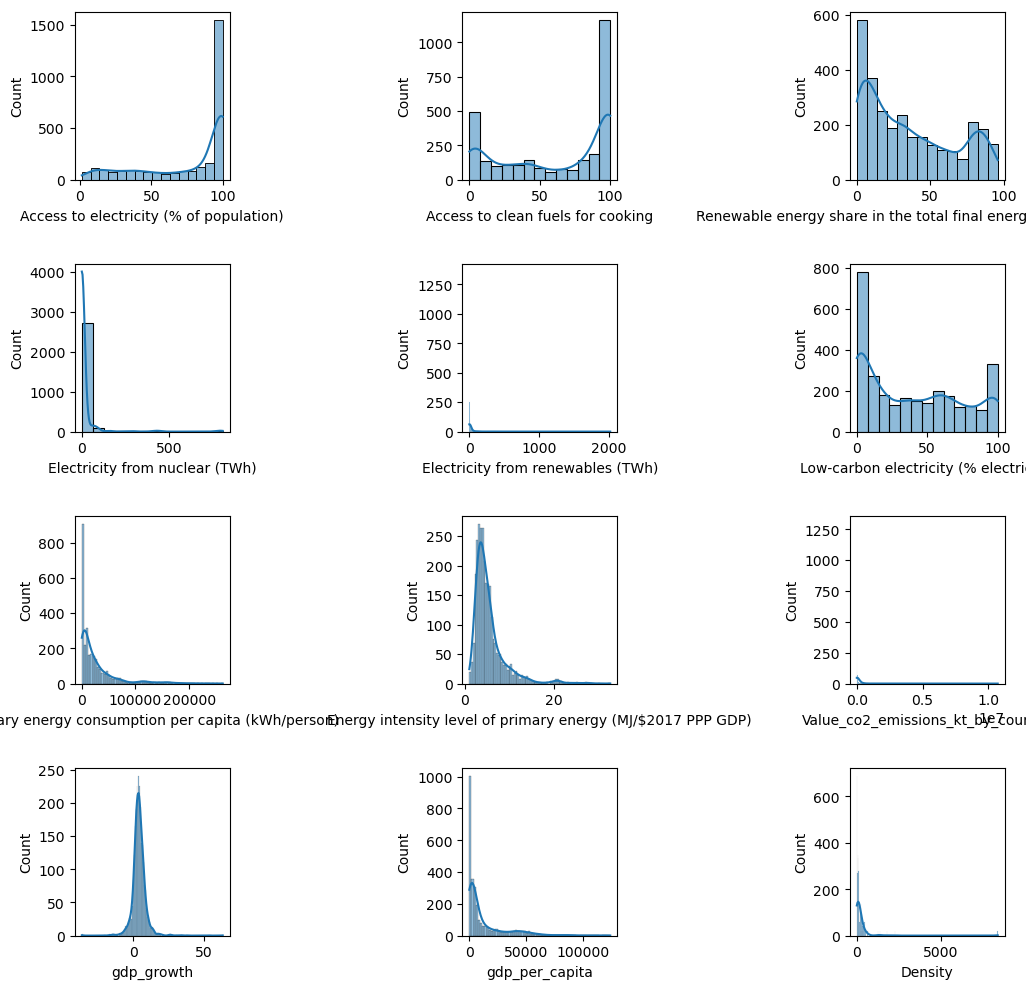

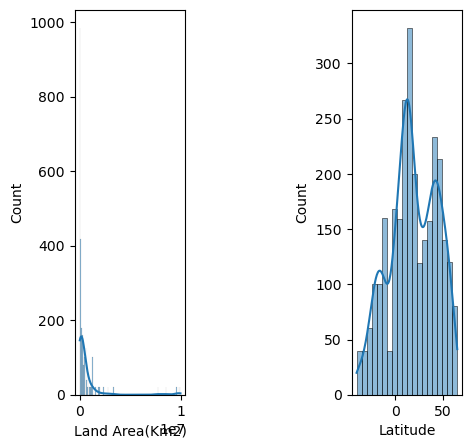

In [46]:
fig,ax=plt.subplots(4,3,figsize=(12, 12))
plt.subplots_adjust(wspace=1.5,hspace=0.5)
k=0
for i in range(4):
    for j in range(3):
        sns.histplot(energyQuant.iloc[:, k], kde=True, ax=ax[i, j])
        k+=1

plt.show()
fig,ax=plt.subplots(1,2,figsize=(5, 5))
plt.subplots_adjust(wspace=1.5,hspace=0.5)
for j in range(2):
    sns.histplot(energyQuant.iloc[:, k], kde=True, ax=ax[j])
    k+=1

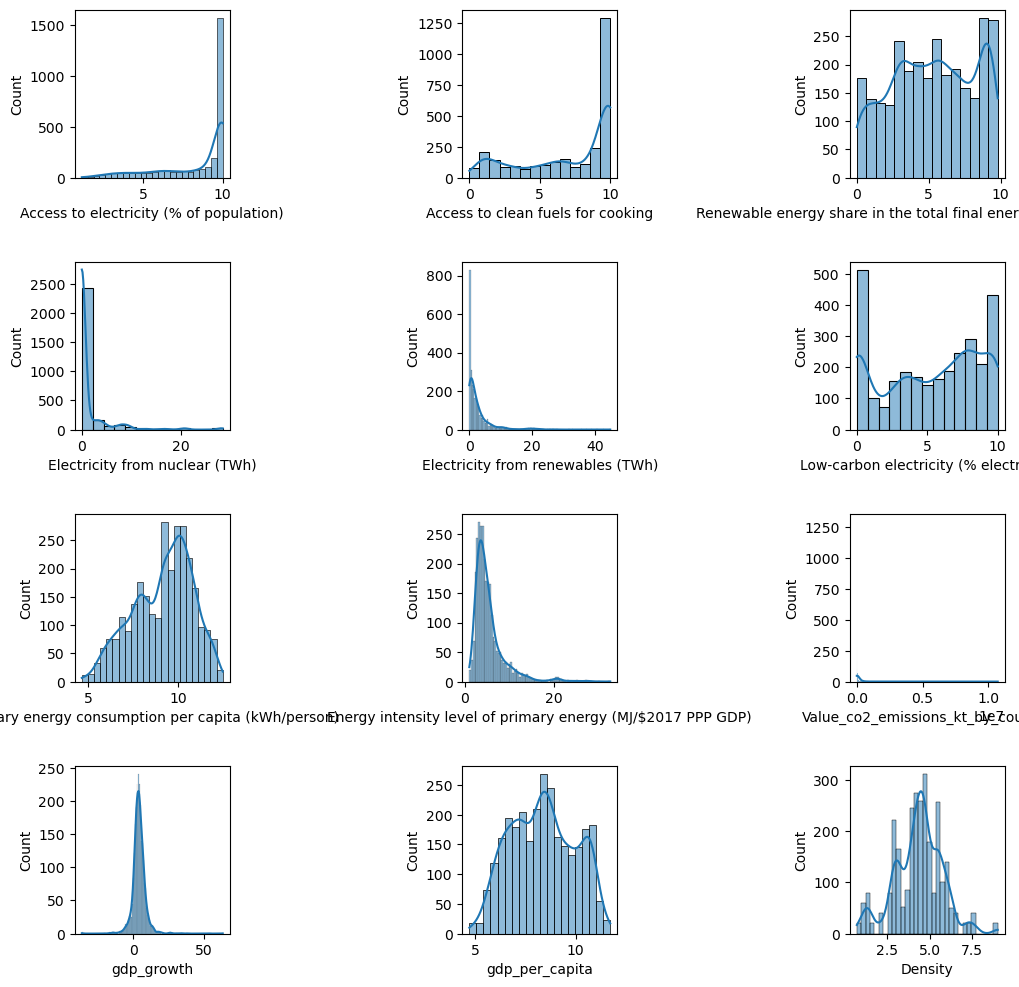

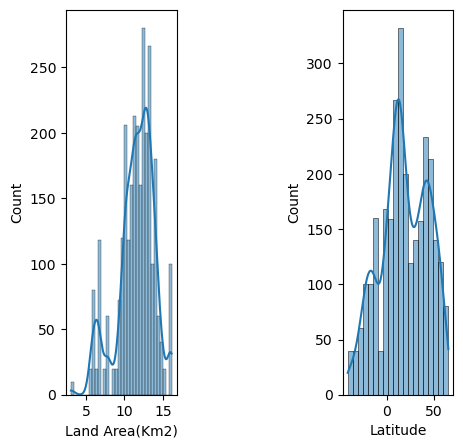

In [47]:
# Prendre la racine carrée des colonnes spécifiques
columns_sqrt = ["Access to electricity (% of population)",
                "Access to clean fuels for cooking",
                "Renewable energy share in the total final energy consumption (%)",
                "Electricity from nuclear (TWh)",
                "Electricity from renewables (TWh)",
                "Low-carbon electricity (% electricity)"]
energy[columns_sqrt] = np.sqrt(energy[columns_sqrt])

# Prendre le logarithme des colonnes spécifiques
columns_log = ["Primary energy consumption per capita (kWh/person)",
               "gdp_per_capita",
               "Density",
               "Land Area(Km2)"]
energy[columns_log] = np.log(energy[columns_log])

energyQuant=energy.iloc[:,2:]

fig,ax=plt.subplots(4,3,figsize=(12, 12))
plt.subplots_adjust(wspace=1.5,hspace=0.5)
k=0
for i in range(4):
    for j in range(3):
        sns.histplot(energyQuant.iloc[:, k], kde=True, ax=ax[i, j])
        k+=1

plt.show()
fig,ax=plt.subplots(1,2,figsize=(5, 5))
plt.subplots_adjust(wspace=1.5,hspace=0.5)
for j in range(2):
    sns.histplot(energyQuant.iloc[:, k], kde=True, ax=ax[j])
    k+=1

#### On transforme les données en leur appliquant des fonctions logarithme ou racine carrée selon leur forme afin de leur donner une forme plus gaussienne.

### <span style="color:blue">**II. Analyse multiimentionnelle** </span>

<Axes: >

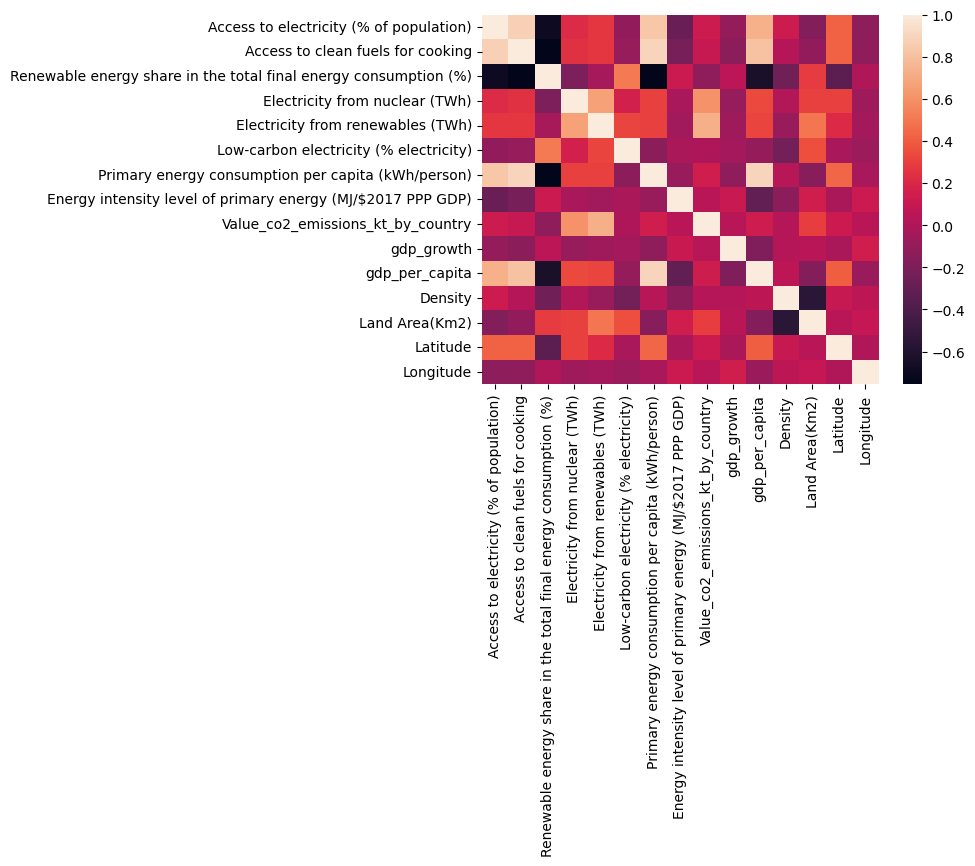

In [48]:
sns.heatmap(energyQuant.corr())

In [49]:

# from scipy.stats import linregress
# res=[]
# for i in range(len(correlation_matrix)):
#     for j in range(i+1, len(correlation_matrix)):
#         correlation_coef = correlation_matrix[i, j]
#         if correlation_coef > 0.8:
#             res.append([data1.columns[i],data1.columns[j]])
# print(res)

# k=0
# fig,ax=plt.subplots(1,2,figsize=(12,6))
# plt.subplots_adjust(wspace=1.5,hspace=0.5)
# j=1
# for i in range(2):
#         # Tracer le nuage de points
#         ax[i].scatter(data1.loc[:, res[k][0]], data1.loc[:, res[k][1]])
    
#         # Calcul de la droite de régression linéaire
#         slope, intercept, _, _, _ = linregress(data1.loc[:, res[k][0]], data1.loc[:, res[k][1]])
#         regression_line = slope * data1.loc[:, res[k][0]] + intercept
    
#         # Tracer la droite de régression linéaire
#         ax[i].plot(slope * data1.loc[:, res[k][0]], regression_line, color='red')
#         # Étiquettes et légendes
#         ax[i].set_xlabel(res[k][0])
#         ax[i].set_ylabel(res[k][1])
#         k+=1
        
#         # Afficher le graphique
# plt.show()

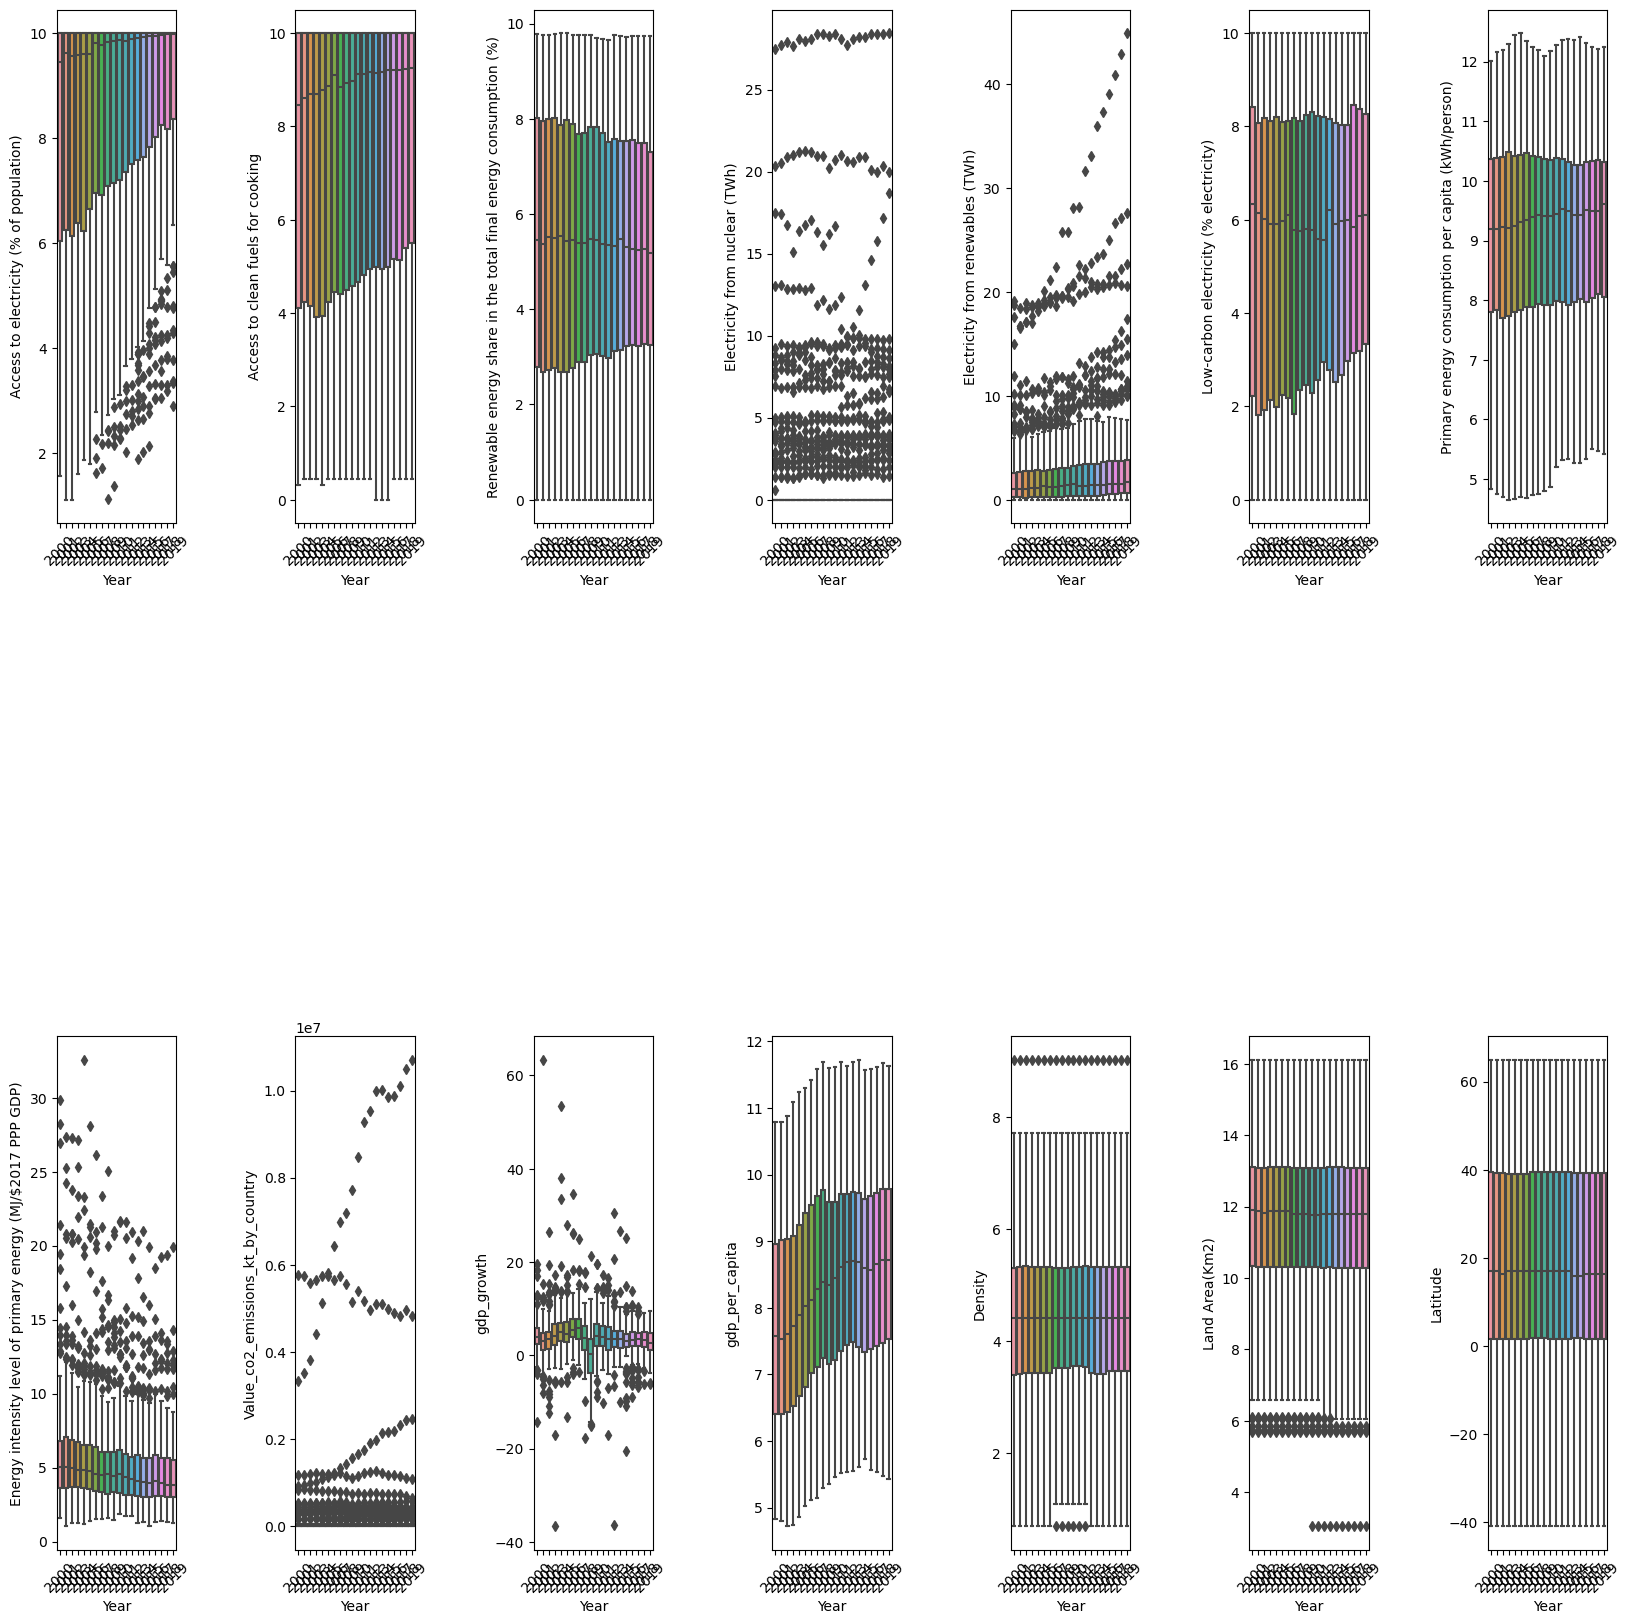

In [50]:
fig,ax=plt.subplots(2,7,figsize=(20,20))
plt.subplots_adjust(hspace=1, wspace=1)
k=0
for i in range(2):
    for j in range(7):
        sns.boxplot(x=energy.iloc[:,1],y=energyQuant.iloc[:,k],data=energy,ax=ax[i, j])
        ax[i, j].set_xticks(ax[i, j].get_xticks())
        ax[i, j].set_xticklabels(ax[i, j].get_xticklabels(), rotation=45)
        k+=1
plt.show()

In [51]:
Value_co2_emissions_kt_by_country=np.log(energy['Value_co2_emissions_kt_by_country'])
energy.drop(['Value_co2_emissions_kt_by_country'],axis=1,inplace=True)
Value_co2_emissions_kt_by_country.reset_index(drop=True,inplace=True)
Value_co2_emissions_kt_by_country.index

RangeIndex(start=0, stop=2868, step=1)

In [52]:
from sklearn.decomposition import PCA
energyQuant1 = (energyQuant - energyQuant.mean()) / energyQuant.std()
pca=PCA()
energyQuant1_pca=pca.fit(energyQuant1).transform(energyQuant1)


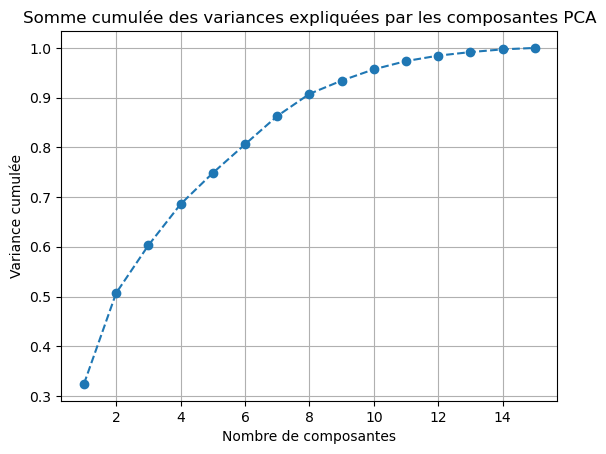

In [53]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Tracer la somme cumulée des variances
plt.plot(range(1,16),cumulative_variance,marker='o',linestyle="--")
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance cumulée')
plt.title('Somme cumulée des variances expliquées par les composantes PCA')
plt.grid(True)
plt.show()

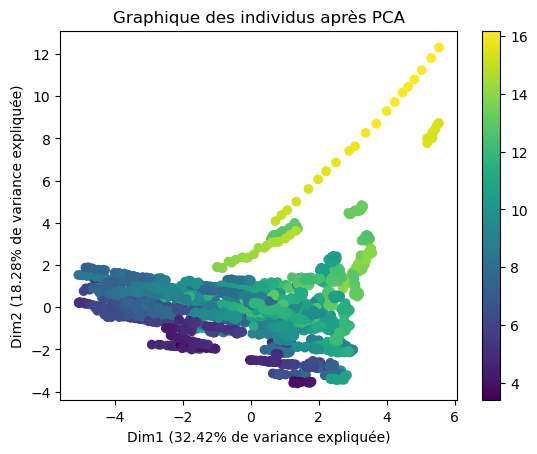

In [55]:
plt.scatter(energyQuant1_pca[:,0],energyQuant1_pca[:,1], c=Value_co2_emissions_kt_by_country)
plt.xlabel(f'Dim1 ({pca.explained_variance_ratio_[0]*100:.2f}% de variance expliquée)')
plt.ylabel(f'Dim2 ({pca.explained_variance_ratio_[1]*100:.2f}% de variance expliquée)')
plt.title('Graphique des individus après PCA')
plt.colorbar()
plt.show()


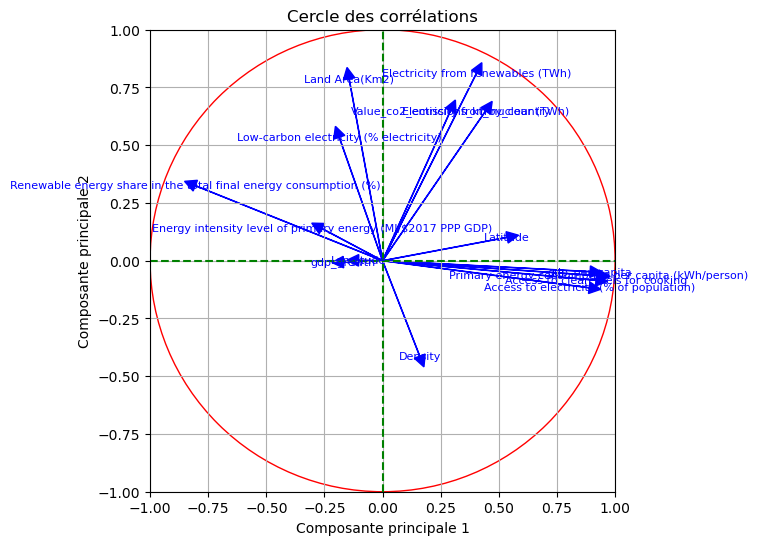

In [56]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

fig, ax = plt.subplots(figsize=(6, 6))

for i, j, nom in zip(coord1, coord2, energyQuant.columns):
    ax.text(i, j, nom, fontsize=8, ha='center', va='center', color='blue')
    ax.arrow(0, 0, i, j, color='blue', head_width=0.05, head_length=0.05)

ax.set(xlim=(-1, 1), ylim=(-1, 1))
ax.axhline(0, linestyle='dashed', color='green')
ax.axvline(0, linestyle='dashed', color='green')

# Ajout du cercle
cercle = plt.Circle((0, 0), radius=1, color='red', fill=False)
ax.add_patch(cercle)

plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Cercle des corrélations')

plt.grid(True)
plt.show()


### <span style="color:blue">**III. Modélisations** </span>

In [57]:
energy.reset_index(drop=True,inplace=True)
energyQuant.reset_index(drop=True,inplace=True)

In [58]:
dataDum=pd.get_dummies(energy[['Year','Entity']])



energyC= pd.concat([dataDum, energyQuant], axis=1) 
energyC.head()

,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,...,Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,0,0,0,1,0,0,0,0,0,0,...,8.186653,5.437941,1.40,1220.000029,8.832278,5.250617,4.094345,13.388153,33.93911,67.709953
1,0,0,0,0,1,0,0,0,0,0,...,7.932298,5.319253,1.20,1029.999971,1.414118,5.353667,4.094345,13.388153,33.93911,67.709953
2,0,0,0,0,0,1,0,0,0,0,...,7.964977,5.529703,1.41,1549.999952,11.229715,5.489067,4.094345,13.388153,33.93911,67.709953
3,0,0,0,0,0,0,1,0,0,0,...,8.728716,5.718411,1.50,1759.999990,5.357403,5.574940,4.094345,13.388153,33.93911,67.709953
4,0,0,0,0,0,0,0,1,0,0,...,8.885233,5.870087,1.53,1769.999981,13.826320,5.885251,4.094345,13.388153,33.93911,67.709953


In [59]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

scaler = StandardScaler()  



XTrain, XTest, YTrain, YTest = train_test_split(energyC, Value_co2_emissions_kt_by_country, test_size=0.2, random_state=111)
scaler.fit(XTrain)
Xr_train = scaler.transform(XTrain)

Xr_test = scaler.transform(XTest)

#### <span style="color:blue">**III.A Regression linéaire** </span>

#### <span style="color:blue">**III.A.1 Modèle sans selection** </span>

In [75]:
from sklearn.linear_model import LinearRegression
regLin = LinearRegression()
regLin.fit(Xr_train, YTrain)
start_time = time.time()
Mse_M={}
Time_M={}
# Making predictions on the testing set
y_chap_RL = regLin.predict(Xr_test)

# Calculating mean squared error
RL_mse = mean_squared_error(YTest, y_chap_RL)
RL_R2=r2_score(YTest,y_chap_RL)
end_time=time.time()
Time=start_time-end_time
Mse_M["RegLinSansSelection"]=RL_mse
Time_M["RegLinSansSelection"]=-Time
print("MSE =", RL_mse)
print("R2 =",RL_R2)
print(-Time)

MSE = 0.09529987267398525
R2 = 0.9820970299441929
0.0007112026214599609


In [76]:
import scipy.stats as stats
import pylab 


<Figure size 640x480 with 0 Axes>

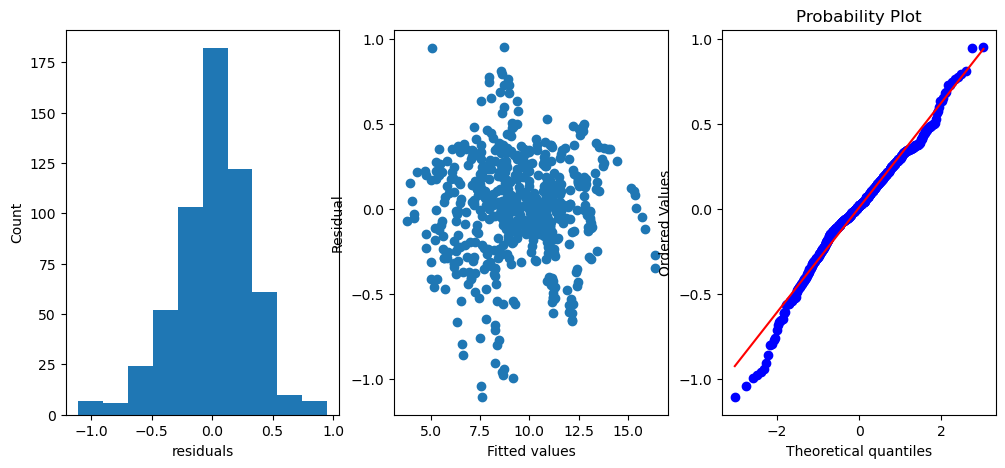

In [77]:
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
plt.hist(YTest-y_chap_RL)
plt.ylabel('Count')
plt.xlabel('residuals')

plt.subplot(1,3,2)
plt.scatter(y_chap_RL,YTest-y_chap_RL)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.subplot(1,3,3)
stats.probplot(YTest-y_chap_RL, dist="norm", plot=pylab)
pylab.show()
plt.show()

#### Les variables qualitatives possédant trop de modalités on va passer à un modèle simplifié ou les pays sont organisés par continent et les années par période quadriennale.

In [78]:
data2=energy.copy()
energy
data2['Year']=data2['Year'].astype(int)
data2['Periode']=(data2['Year']//4)*4
data2['Periode']=data2['Periode']

#Rennommer les années en période:
data2['Periode'] = data2['Periode'].astype('category')





data2.drop(columns=['Year'],inplace=True)


data2.head()



,Entity,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude,Periode
0,Afghanistan,3.839076,3.082207,6.054750,0.0,0.793725,8.186653,5.437941,1.40,8.832278,5.250617,4.094345,13.388153,33.93911,67.709953,2000
1,Afghanistan,4.479394,3.301515,6.651316,0.0,0.748331,7.932298,5.319253,1.20,1.414118,5.353667,4.094345,13.388153,33.93911,67.709953,2004
2,Afghanistan,5.038938,3.492850,5.820653,0.0,0.768115,7.964977,5.529703,1.41,11.229715,5.489067,4.094345,13.388153,33.93911,67.709953,2004
3,Afghanistan,5.542444,3.721559,5.647123,0.0,0.800000,8.728716,5.718411,1.50,5.357403,5.574940,4.094345,13.388153,33.93911,67.709953,2004
4,Afghanistan,6.004249,3.911521,5.364699,0.0,0.866025,8.885233,5.870087,1.53,13.826320,5.885251,4.094345,13.388153,33.93911,67.709953,2004


In [79]:
import country_converter as coco


data2['Continent']= coco.convert(names=data2['Entity'], to='continent')



data2.head()



,Entity,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude,Periode,Continent
0,Afghanistan,3.839076,3.082207,6.054750,0.0,0.793725,8.186653,5.437941,1.40,8.832278,5.250617,4.094345,13.388153,33.93911,67.709953,2000,Asia
1,Afghanistan,4.479394,3.301515,6.651316,0.0,0.748331,7.932298,5.319253,1.20,1.414118,5.353667,4.094345,13.388153,33.93911,67.709953,2004,Asia
2,Afghanistan,5.038938,3.492850,5.820653,0.0,0.768115,7.964977,5.529703,1.41,11.229715,5.489067,4.094345,13.388153,33.93911,67.709953,2004,Asia
3,Afghanistan,5.542444,3.721559,5.647123,0.0,0.800000,8.728716,5.718411,1.50,5.357403,5.574940,4.094345,13.388153,33.93911,67.709953,2004,Asia
4,Afghanistan,6.004249,3.911521,5.364699,0.0,0.866025,8.885233,5.870087,1.53,13.826320,5.885251,4.094345,13.388153,33.93911,67.709953,2004,Asia


In [80]:


# # Filtrer le DataFrame pour les États-Unis
# usa_row = data2[data2['Entity'] == 'United States']

# # Vérifier si une ligne correspondant aux États-Unis a été trouvée
# if not usa_row.empty:
#     # Récupérer le continent des États-Unis à partir de la ligne filtrée
#     usa_continent = usa_row['Continent'].iloc[0]
#     print("Le continent des États-Unis dans le dataset est:", usa_continent)
# else:
#     print("Aucune entrée pour les États-Unis dans le dataset.")

In [81]:
data2.drop(columns=['Entity'],inplace=True)

#### #### <span style="color:blue">**III.A.2 Regression linéaire sur les nouvelles données** </span>

In [67]:


dataDum1=pd.get_dummies(data2[['Periode','Continent']])


df= pd.concat([dataDum1, energyQuant], axis=1) 

print(df.columns.tolist())

scaler = StandardScaler()  



XTrain, XTest, YTrain, YTest = train_test_split(df, Value_co2_emissions_kt_by_country, test_size=0.2, random_state=11)
scaler.fit(XTrain)
Xr_train = scaler.transform(XTrain)

Xr_test = scaler.transform(XTest)


df.head()

['Periode_2000', 'Periode_2004', 'Periode_2008', 'Periode_2012', 'Periode_2016', 'Continent_Africa', 'Continent_America', 'Continent_Asia', 'Continent_Europe', 'Continent_Oceania', 'Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita', 'Density', 'Land Area(Km2)', 'Latitude', 'Longitude']


,Periode_2000,Periode_2004,Periode_2008,Periode_2012,Periode_2016,Continent_Africa,Continent_America,Continent_Asia,Continent_Europe,Continent_Oceania,...,Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,1,0,0,0,0,0,0,1,0,0,...,8.186653,5.437941,1.40,1220.000029,8.832278,5.250617,4.094345,13.388153,33.93911,67.709953
1,0,1,0,0,0,0,0,1,0,0,...,7.932298,5.319253,1.20,1029.999971,1.414118,5.353667,4.094345,13.388153,33.93911,67.709953
2,0,1,0,0,0,0,0,1,0,0,...,7.964977,5.529703,1.41,1549.999952,11.229715,5.489067,4.094345,13.388153,33.93911,67.709953
3,0,1,0,0,0,0,0,1,0,0,...,8.728716,5.718411,1.50,1759.999990,5.357403,5.574940,4.094345,13.388153,33.93911,67.709953
4,0,1,0,0,0,0,0,1,0,0,...,8.885233,5.870087,1.53,1769.999981,13.826320,5.885251,4.094345,13.388153,33.93911,67.709953


In [82]:
from sklearn.linear_model import LinearRegression
start=time.time()
regLin = LinearRegression()
regLin.fit(Xr_train, YTrain)  



# Making predictions on the testing set
y_chap_RLb= regLin.predict(Xr_test)

# Calculating mean squared error
RL_mseb = mean_squared_error(YTest, y_chap_RLb)
RL_R2b=r2_score(YTest,y_chap_RLb)
end=time.time()

Time=end_time-start_time
Mse_M["RegLinAvecSuppression"]=RL_mseb
Time_M["RegLinAvecSuppression"]=Time
print("MSE nouveau =", RL_mseb)
print("R2 nouveau =",RL_R2b)


print("MSE =", RL_mse)
print("R2 =",RL_R2)
print(Time)

MSE nouveau = 0.09529987267398525
R2 nouveau = 0.9820970299441929
MSE = 0.09529987267398525
R2 = 0.9820970299441929
0.0007112026214599609


<Figure size 640x480 with 0 Axes>

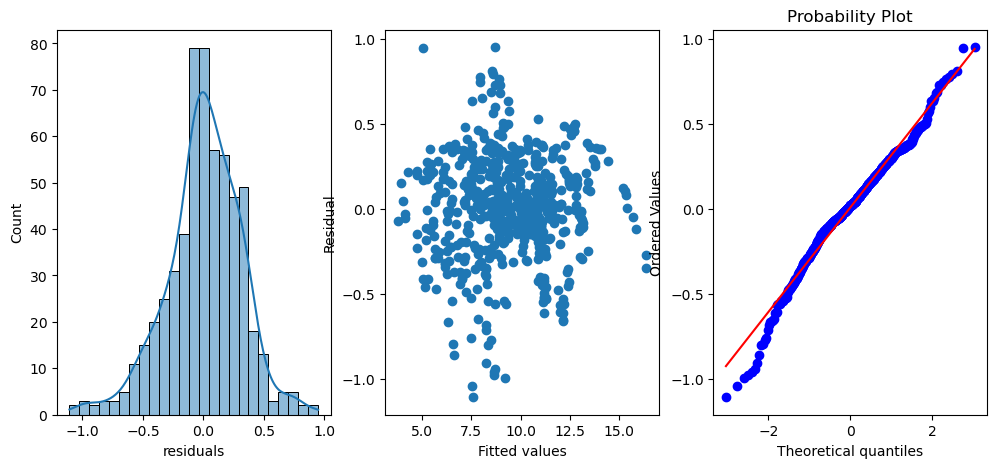

In [69]:
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
sns.histplot(YTest-y_chap_RLb,kde=True)
plt.ylabel('Count')
plt.xlabel('residuals')

plt.subplot(1,3,2)
plt.scatter(y_chap_RLb,YTest-y_chap_RLb)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.subplot(1,3,3)
stats.probplot(YTest-y_chap_RLb, dist="norm", plot=pylab)
pylab.show()
plt.show()

#### <span style="color:blue">**III.A.3 Regression linéaire Lasso** </span>

In [148]:
from sklearn.linear_model import Lasso
# Fitting the Lasso regression model
start_time = time.time()
regLasso = Lasso()
regLasso.fit(Xr_train, YTrain)

# Making predictions on the testing set
y_chap_lasso = regLasso.predict(Xr_test)

# Calculating mean squared error
lasso_mse = mean_squared_error(YTest, y_chap_lasso)
lasso_R2=r2_score(YTest,y_chap_lasso)
end_time = time.time()
Time=end_time-start_time
Mse_M["RegLinLasso"]=lasso_mse
Time_M["RegLinLasso"]=Time
print("MSE =", lasso_mse)
print("R2 = ",lasso_R2)
print("Time= ",Time)

MSE = 3.548730238784595
R2 =  0.33333792146355234
Time=  0.0029120445251464844


In [84]:
coef = pd.Series(regLasso.coef_, index = XTrain.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 3 variables et en supprime 22


Text(0, 0.5, 'Residuals')

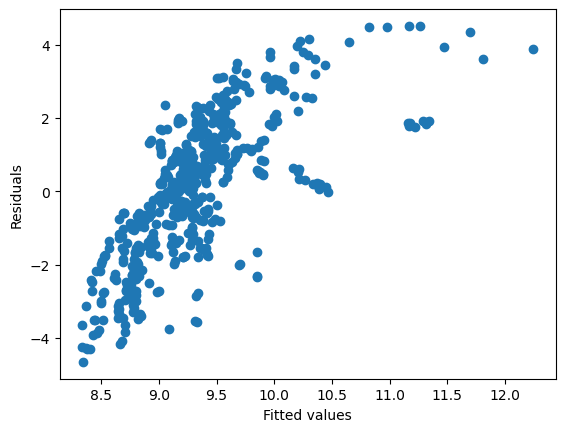

In [85]:
plt.scatter(y_chap_lasso,YTest-y_chap_lasso)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [86]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs du paramètre alpha à optimiser

param=[{"alpha":[0,0.05,0.1,0.2,0.3,50,500,1000,1500]}]
regLasso = GridSearchCV(Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, YTrain)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discou

Meilleur R2 = 0.982235, Meilleur paramètre = {'alpha': 0}


/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.137e+02, tolerance: 1.325e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [87]:
y_chap_lassOpt=regLassOpt.predict(Xr_test)
lassOpt_mse=mean_squared_error(y_chap_lassOpt,YTest)
lassOpt_R2=r2_score(YTest,y_chap_lassOpt)
print("MSE=",lassOpt_mse)
print("R2=",lassOpt_R2)
#Le modèle est sur paramétré avec 20

MSE= 0.0952993276229083
R2= 0.982097132337122


<Figure size 640x480 with 0 Axes>

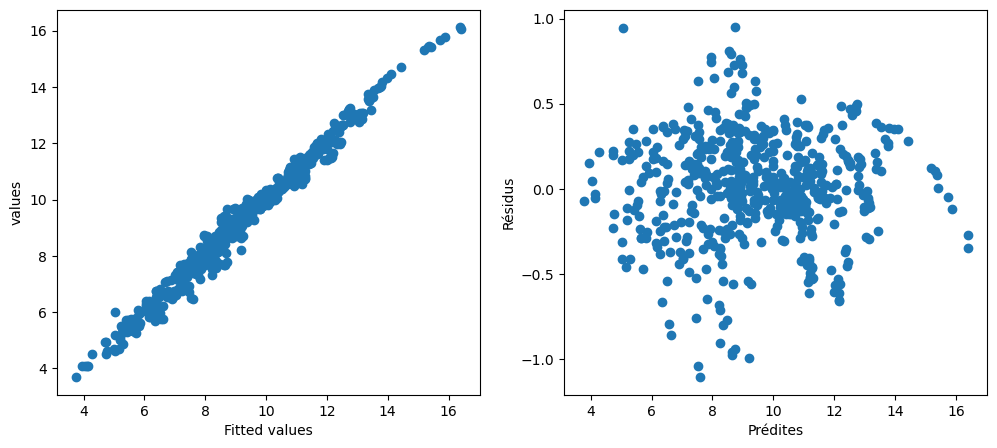

In [88]:
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(y_chap_lassOpt,YTest,"o")
plt.xlabel("Fitted values")
plt.ylabel("values")

plt.subplot(1,2,2)
plt.plot(y_chap_lassOpt,YTest-y_chap_lassOpt,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.show()



In [89]:
coef = pd.Series(regLassOpt.best_estimator_.coef_, index = XTrain.columns)
print("LassoOPT conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

LassoOPT conserve 25 variables et en supprime 0


### <span style="color:blue"> **III.B SVM**  </span>

In [98]:
XTr_svm, XT_svm, YTr_svm, YT_svm = train_test_split(energyQuant, Value_co2_emissions_kt_by_country, test_size=0.2, random_state=11)
scaler.fit(XTr_svm)
Xr_train_svm = scaler.transform(XTr_svm)

Xr_test_svm = scaler.transform(XT_svm)



In [99]:
 from sklearn.svm import SVR

param = {'coef0': [2, 3, 4,5,6,7,12,15]}  # Range of C and degree values to try
svm = GridSearchCV(SVR(epsilon=0.1, kernel='poly'), param_grid=param, cv=10, n_jobs=-1)
svmOpt = svm.fit(Xr_train_svm,YTr_svm)

# Best parameters
print("Best score = %f, Best parameters = %s" % (1. - svmOpt.best_score_, svmOpt.best_params_))

Best score = 0.004809, Best parameters = {'coef0': 15}


In [100]:
from sklearn.svm import SVR

param = {'degree': [2, 3, 4,5,6]}  # Range of C and degree values to try
svm = GridSearchCV(SVR(epsilon=0.1,coef0=2, kernel='poly'), param_grid=param, cv=10, n_jobs=-1)
svmOpt = svm.fit(Xr_train_svm, YTr_svm)

# Best parameters
print("Best score = %f, Best parameters = %s" % (1. - svmOpt.best_score_, svmOpt.best_params_))

Best score = 0.005140, Best parameters = {'degree': 3}


In [101]:

#param= {'C': [0,5,10,15,100,200],}
param = {"C":[0.4,0.5,0.6,0.8,1,1.4,10,15]} 
svm= GridSearchCV(SVR(epsilon=0.1,kernel='poly',coef0=2,gamma=0.06),param,cv=10,n_jobs=-1)
svmOpt=svm.fit(Xr_train_svm, YTr_svm)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - svmOpt.best_score_,svmOpt.best_params_))


Meilleur score = 0.004599, Meilleur paramètre = {'C': 10}


In [96]:
svm=SVR(kernel='poly', degree=3, gamma=0.06, coef0=2,  C=10, epsilon=0.2)

Time 20.613943815231323
MSE= 0.014404185250223816


<Figure size 640x480 with 0 Axes>

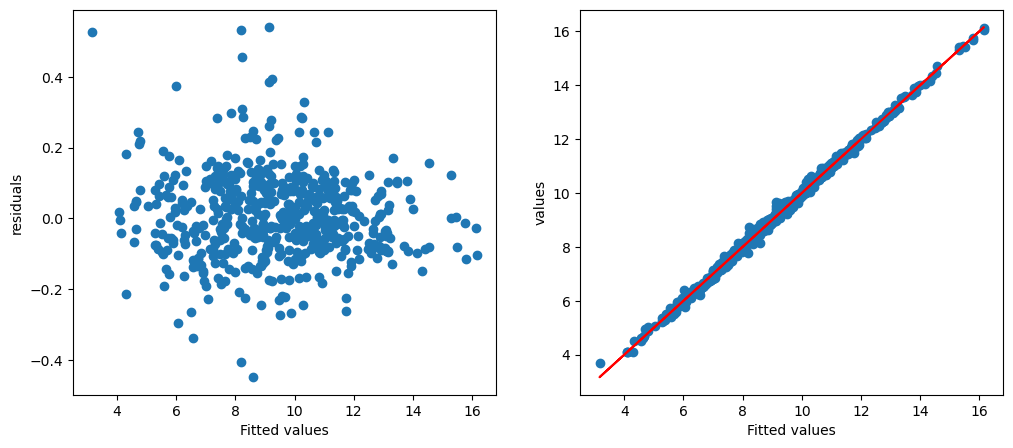

In [108]:
start=time.time()
svmOpt=svm.fit(Xr_train_svm, YTr_svm)
y_chap_svm = svmOpt.predict(Xr_test_svm)
svm_mse=mean_squared_error(y_chap_svm,YTest)
end=time.time()
Time=end-start
Mse_M["SVM"]=svm_mse
Time_M["SVM"]=Time
print("Time",Time)
print("MSE=",svm_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap_svm,YTest-y_chap_svm)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap_svm,YTest)
plt.plot(y_chap_svm,y_chap_svm,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

### <span style="color:blue"> **III.C Cart**  </span>

In [117]:
 from sklearn.tree import DecisionTreeRegressor
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,18))}]
tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))



Meilleur score = 0.000056, Meilleur paramètre = {'max_depth': 17}


In [118]:
DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=30)
treeOpt=tree.fit(Xr_train, YTrain)


In [119]:
treeOpt.score(Xr_test,YTest)

0.9999660748449485

Time=  0.0008614063262939453
MSE= 0.0001805880782223644


<Figure size 640x480 with 0 Axes>

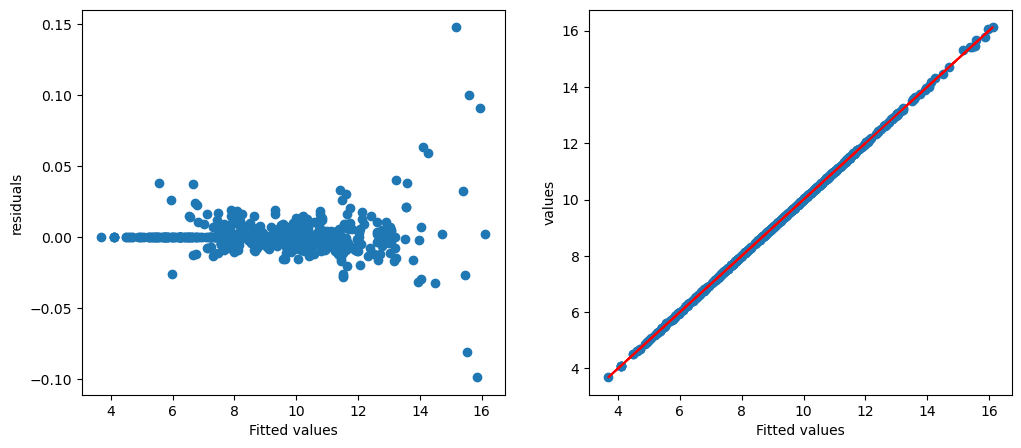

In [120]:
Start=time.time()
y_chap_cart = treeOpt.predict(Xr_test)
cart_mse=mean_squared_error(y_chap_cart,YTest)
end=time.time()
Time=end-Start
Mse_M["Cart"]=cart_mse
Time_M["Cart"]=Time
print("Time= ",Time)
print("MSE=",cart_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap_cart,YTest-y_chap_cart)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap_cart,YTest)
plt.plot(y_chap_cart,y_chap_cart,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

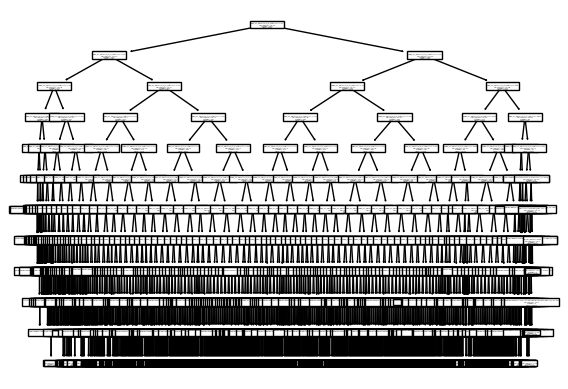

In [121]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
treeG=DecisionTreeRegressor(max_depth=treeOpt.best_params_['max_depth'])
treeG.fit(Xr_train,YTrain)
plot_tree(treeG,feature_names=df.columns.tolist());
plt.show()

### <span style="color:blue"> **III.D Random forest**  </span>

In [129]:
 from sklearn.ensemble import RandomForestRegressor 
import time
start_time = time.time()
# définition des paramètres
forest = RandomForestRegressor(n_estimators=500,  max_depth=None,
   min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(Xr_train,YTrain)
#Erreur Out Of Bag
print(1-rfFit.oob_score_)
end_time = time.time()
# Calculate execution time
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

3.0429228092820892e-05
Execution time: 5.121034383773804 seconds


In [130]:
 # erreur de prévision sur le test
1-rfFit.score(Xr_test,YTest)

3.624612647779024e-05

In [131]:
# param=[{"n_estimators":list(range(1,500,50))}]
# rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
#         param,cv=5,n_jobs=-1)
# rfOpt=rf.fit(Xr_train, YTrain)
# # paramètre optimal
# print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

In [132]:
param=[{"max_features":list(range(2,20,2))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.000083, Meilleur paramètre = {'max_features': 18}


In [133]:
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(Xr_train.shape[1]):
    print(df.columns[indices[f]], importances[indices[f]])

Value_co2_emissions_kt_by_country 0.9981031791099705
Density 0.0007903276926316438
Land Area(Km2) 0.0005902297565680552
Electricity from renewables (TWh) 0.00034273889334726756
Renewable energy share in the total final energy consumption (%) 3.106996072205501e-05
Primary energy consumption per capita (kWh/person) 2.6720609746504774e-05
Access to electricity (% of population) 2.200066280475352e-05
Electricity from nuclear (TWh) 1.9921876315012753e-05
Longitude 1.5822550147068304e-05
gdp_per_capita 1.291861530382327e-05
Energy intensity level of primary energy (MJ/$2017 PPP GDP) 9.263771217416022e-06
Latitude 8.075119973446084e-06
Access to clean fuels for cooking 6.9381222062522566e-06
Low-carbon electricity (% electricity) 5.5763483068777396e-06
gdp_growth 5.208947017830571e-06
Continent_Europe 3.1220612554752387e-06
Continent_Asia 2.1394676498952353e-06
Periode_2008 1.7119597139650536e-06
Periode_2000 1.000093710290932e-06
Continent_America 7.233461009526653e-07
Periode_2004 5.0565228

In [134]:
# définition des paramètres
start=time.time()
forest = RandomForestRegressor(n_estimators=351,  max_depth=None,
   min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None,
   bootstrap=True, oob_score=True,max_features=12)
# apprentissage
rfFit = forest.fit(XTrain,YTrain)
end=time.time()
Time=end-start
Time_M["RandomForest"]=Time
#Erreur Out Of Bag
print(1-rfFit.oob_score_)



0.00017852561948794587


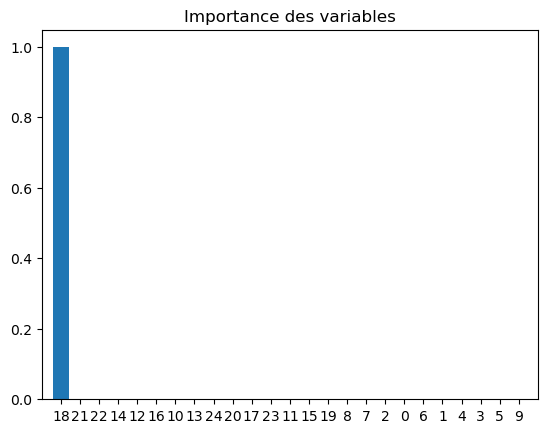

In [135]:
 # Graphe des importances
plt.figure()
plt.title("Importance des variables")
plt.bar(range(Xr_train.shape[1]), importances[indices]);
plt.xticks(range(Xr_train.shape[1]), indices);
plt.xlim([-1, Xr_train.shape[1]]);
plt.show()

MSE= 0.0009505877797026192


<Figure size 640x480 with 0 Axes>

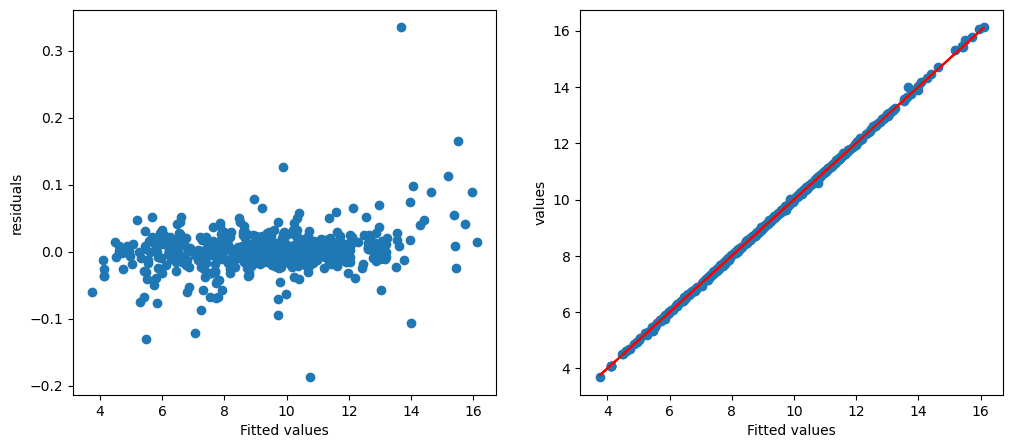

In [136]:
y_chap_rf = forest.predict(XTest)
rf_mse=mean_squared_error(y_chap_rf,YTest)
Mse_M["RandomForest"]=rf_mse
print("MSE=",rf_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap_rf,YTest-y_chap_rf)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap_rf,YTest)
plt.plot(y_chap_rf,y_chap_rf,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

### <span style="color:blue"> **III.E Réseaux de neurone**  </span>

In [65]:
 from sklearn.neural_network import MLPRegressor
    

In [141]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (15,), (20,)],  
    'activation': ['relu', 'tanh', 'logistic'],           
    'alpha': [0.0001, 0.001, 0.01],                       
    'learning_rate_init': [0.001, 0.01, 0.1]              
}


nnet = MLPRegressor(max_iter=500)


grid_search = GridSearchCV(estimator=nnet, param_grid=param_grid, cv=10, n_jobs=-1)

s=time.time()
grid_search.fit(Xr_train, YTrain)




y_pred = grid_search.predict(Xr_test)
mse = mean_squared_error(YTest, y_pred)
end=time.time()
Time=end-s
Mse_M["NeuralNetwork"]=mse
Time_M["NeuralNetwork"]=Time
print("Mean Squared Error on Test Set:", mse)
print("Time= ",Time)
print("Meilleur score =", 1. - grid_search.best_score_)
print("Meilleurs paramètres =", grid_search.best_params_)

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib

Mean Squared Error on Test Set: 0.022652232706889524
Time=  77.8253481388092
Meilleur score = 0.004680832181233718
Meilleurs paramètres = {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (20,), 'learning_rate_init': 0.01}


In [149]:
print(Mse_M)
print(Time_M)

{'RegLinSansSelection': 0.09529987267398525, 'RegLinAvecSuppression': 0.09529987267398525, 'RegLinLasso': 3.548730238784595, 'SVM': 0.014404185250223816, 'Cart': 0.0001805880782223644, 'RandomForest': 0.0009505877797026192, 'NeuralNetwork': 0.022652232706889524}
{'RegLinSansSelection': 0.0007112026214599609, 'RegLinAvecSuppression': 0.0007112026214599609, 'RegLinLasso': 0.0029120445251464844, 'SVM': 20.613943815231323, 'Cart': 0.0008614063262939453, 'RandomForest': 2.1274209022521973, 'NeuralNetwork': 77.8253481388092}


In [150]:

sorted_Mse_M = dict(sorted(Mse_M.items(), key=lambda item: item[1]))
sorted_Time_M = dict(sorted(Time_M.items(), key=lambda item: item[1]))


print("MSE trié :", sorted_Mse_M)
print("Temps trié :", sorted_Time_M)


MSE trié : {'Cart': 0.0001805880782223644, 'RandomForest': 0.0009505877797026192, 'SVM': 0.014404185250223816, 'NeuralNetwork': 0.022652232706889524, 'RegLinSansSelection': 0.09529987267398525, 'RegLinAvecSuppression': 0.09529987267398525, 'RegLinLasso': 3.548730238784595}
Temps trié : {'RegLinSansSelection': 0.0007112026214599609, 'RegLinAvecSuppression': 0.0007112026214599609, 'Cart': 0.0008614063262939453, 'RegLinLasso': 0.0029120445251464844, 'RandomForest': 2.1274209022521973, 'SVM': 20.613943815231323, 'NeuralNetwork': 77.8253481388092}


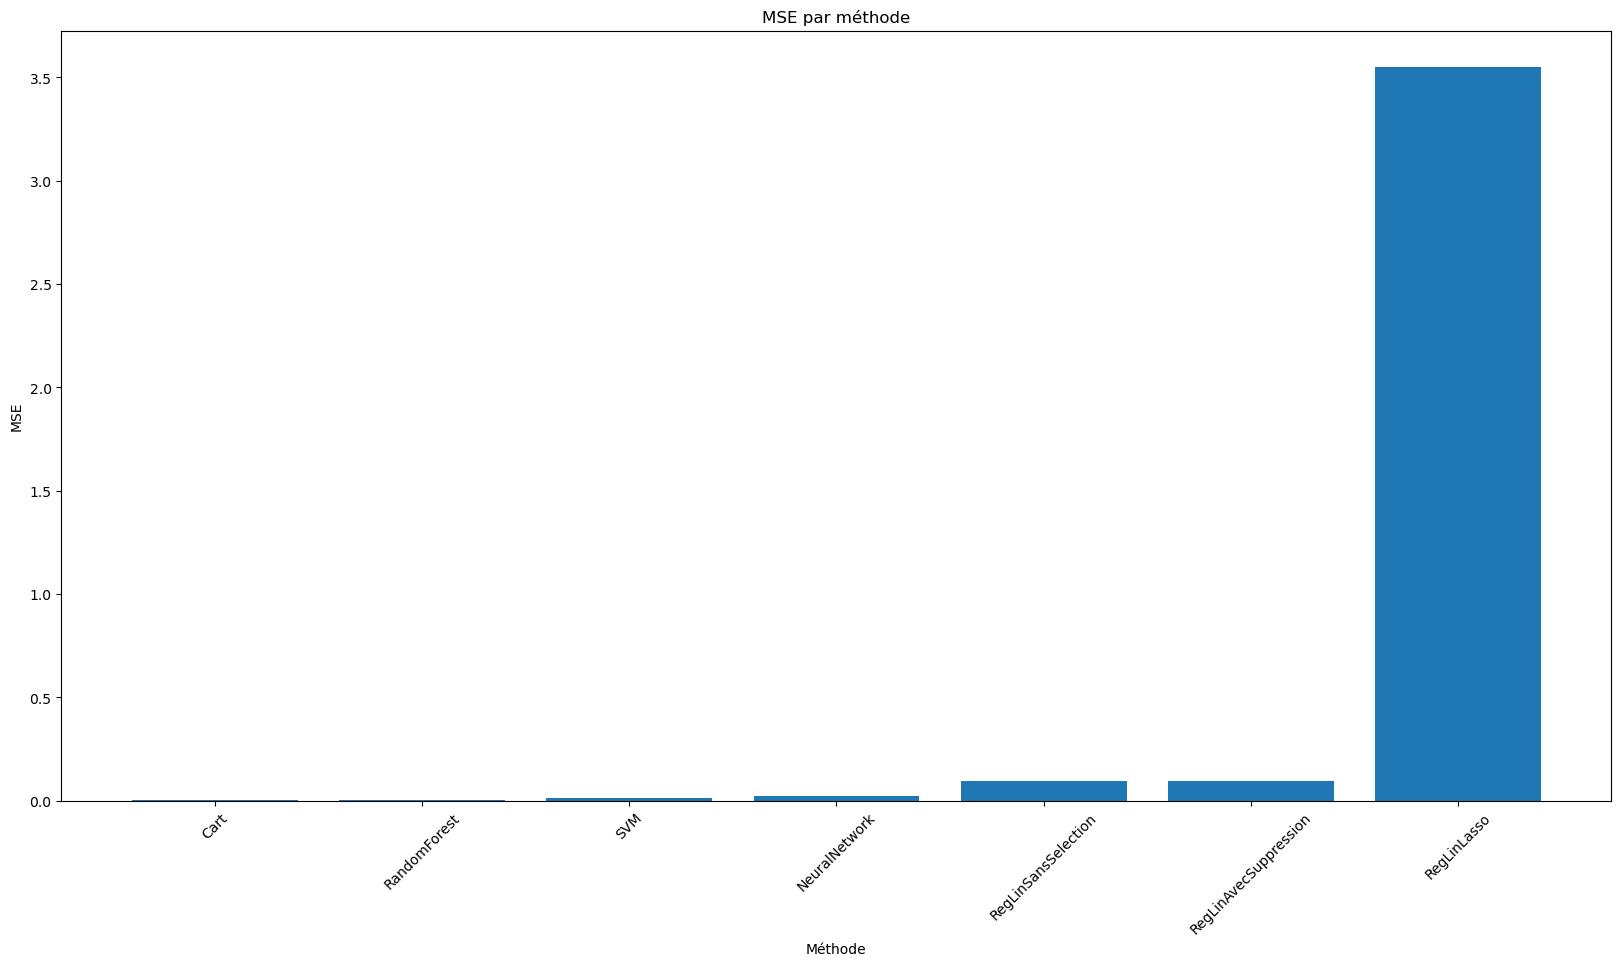

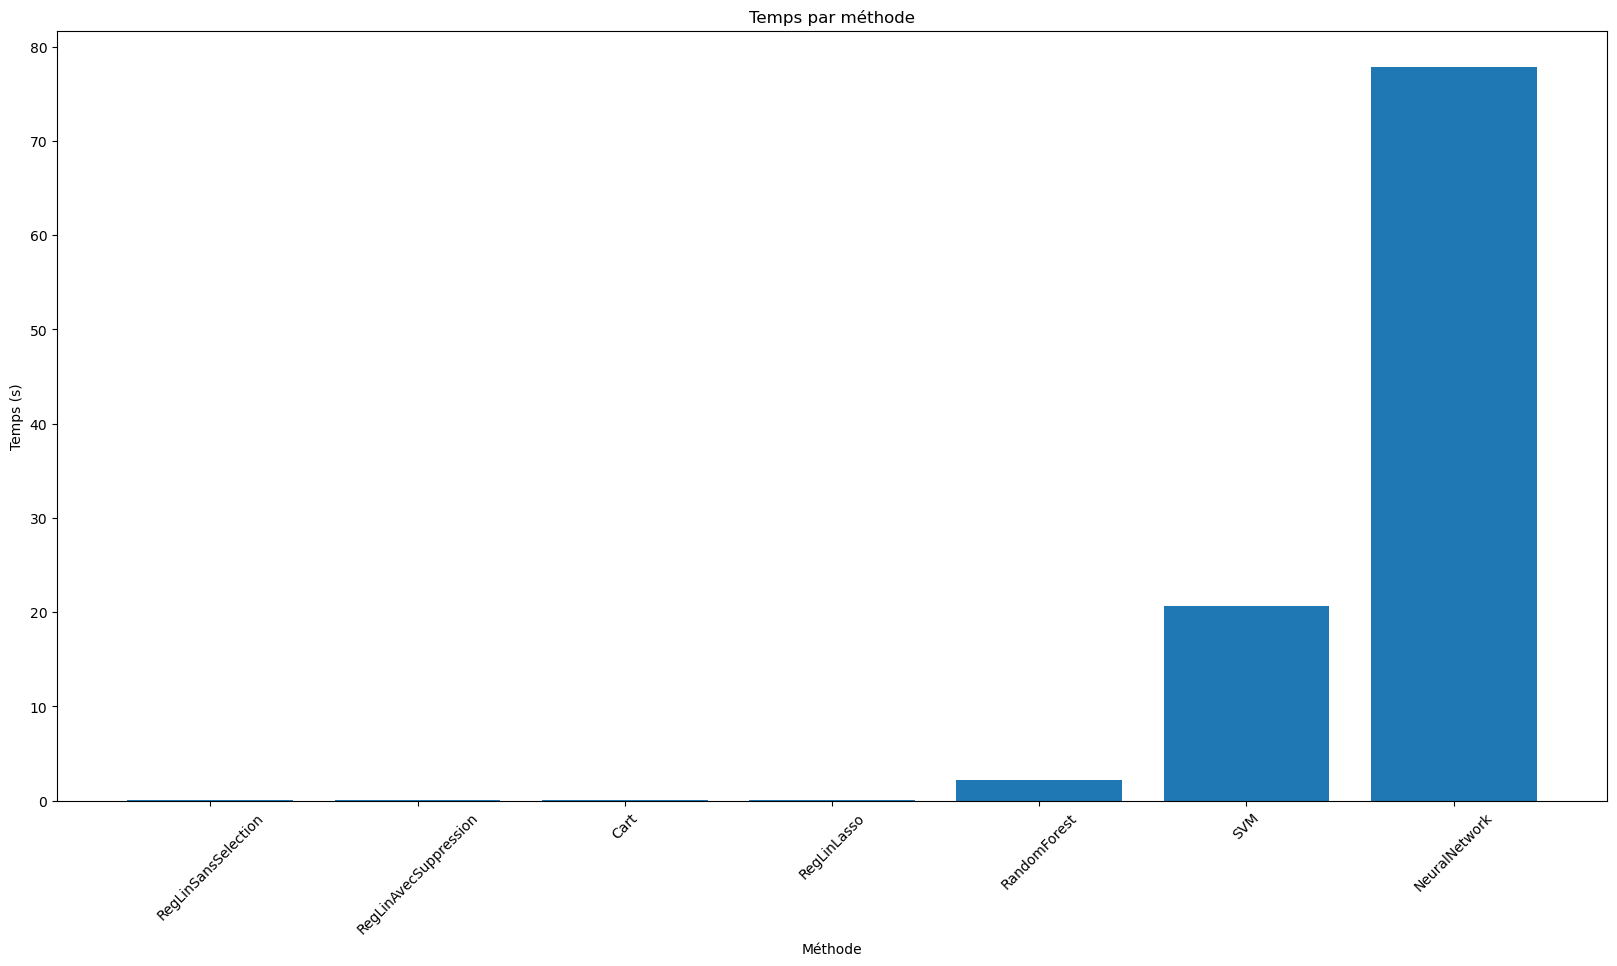

In [155]:
plt.figure(figsize=(20, 10))

# Plot du MSE par méthode
plt.bar(sorted_Mse_M.keys(), sorted_Mse_M.values())
plt.title('MSE par méthode')
plt.xlabel('Méthode')
plt.ylabel('MSE')
plt.xticks(rotation=45)  
plt.show()

# Plot du temps par méthode
plt.figure(figsize=(20, 10))
plt.bar(sorted_Time_M.keys(), sorted_Time_M.values())
plt.title('Temps par méthode')
plt.xlabel('Méthode')
plt.ylabel('Temps (s)')
plt.xticks(rotation=45)  
plt.show()


### <span style="color:blue"> **IV Modélisation avec les données manquantes**  </span>

#### <span style="color:blue"> **IV.A Imputation des données manquantes**  </span>

In [453]:
energy3=pd.read_csv('global-data-on-sustainable-energy.csv')
energy3.head()


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [454]:

energy3.rename(columns={energy3.columns[17]: 'Density'}, inplace=True) #renommer la colonne Density pour faciliter l'accés à la variable
energy3['Density']= pd.to_numeric(energy3['Density'], errors='coerce')


In [455]:

energy3['Year']=energy3['Year'].astype(int)
# Définir les labels pour les catégories
bins = [2000, 2004, 2008, 2012, 2016]  
labels = ['2000-2004', '2004-2008', '2008-2012', '2012-2016']

# Transformer les années en periodes
energy3['Periode'] = pd.cut(energy3['Year'], bins=bins, labels=labels)
energy3['Periode'] = energy3['Periode'].astype('category')
energy3.drop(columns=['Year'],inplace=True)
energy3.head()

energy3['Continent']= coco.convert(names=energy3['Entity'], to='continent')

energy3.drop(['Entity'],axis=1, inplace=True)

In [456]:
# Prendre la racine carrée des colonnes spécifiques
columns_sqrt = ["Access to electricity (% of population)",
                "Access to clean fuels for cooking",
                "Renewable energy share in the total final energy consumption (%)",
                "Electricity from nuclear (TWh)","Primary energy consumption per capita (kWh/person)",
                "Electricity from renewables (TWh)",
                "Low-carbon electricity (% electricity)"]
energy3[columns_sqrt] = np.sqrt(energy3[columns_sqrt])

# Prendre le logarithme des colonnes spécifiques
columns_log = ["gdp_per_capita",
               "Density",
               "Land Area(Km2)","Value_co2_emissions_kt_by_country",]
energy3[columns_log] = np.log(energy3[columns_log])

#Nous isolons la variable à prédire, 

#energy3.drop(["Value_co2_emissions_kt_by_country"],axis=1,inplace=True)

#Nous enlecons les variables quantitatives qui ont beaucoup de NaN
energy3.drop(["Renewable-electricity-generating-capacity-per-capita","Financial flows to developing countries (US $)","Renewables (% equivalent primary energy)"],axis=1,inplace=True)
energy3.drop(['Electricity from fossil fuels (TWh)'],axis=1,inplace=True)

In [457]:
#On retire les variables qualitatives
energyQuant3=energy3.drop(["Periode","Continent"],axis=1)

##### <span style="color:blue"> **IV.A.1 Imputation simple**  </span>

In [458]:
from sklearn.impute import SimpleImputer

energyQuant_mean = SimpleImputer().fit_transform(energyQuant3)


In [459]:
energyQuant_meanImp=pd.DataFrame(energyQuant_mean, columns=energyQuant3.columns)
energyQuant_meanImp.head()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,1.270272,2.489980,6.707459,0.0,0.556776,8.121419,17.395253,1.64,6.633318,3.441610,8.441109,4.094345,13.388153,33.93911,67.709953
1,2.018557,2.683282,6.752777,0.0,0.707107,9.205746,15.391291,1.74,6.593045,3.441610,8.441109,4.094345,13.388153,33.93911,67.709953
2,3.067435,2.863564,6.150610,0.0,0.748331,9.008853,14.521093,1.40,6.937314,3.441610,5.189766,4.094345,13.388153,33.93911,67.709953
3,3.839076,3.082207,6.054750,0.0,0.793725,8.186653,15.164703,1.40,7.106606,8.832278,5.250617,4.094345,13.388153,33.93911,67.709953
4,4.479394,3.301515,6.651316,0.0,0.748331,7.932298,14.290950,1.20,6.937314,1.414118,5.353667,4.094345,13.388153,33.93911,67.709953


##### <span style="color:blue"> **IV.A.2 Imputation avec KNN**  </span>

In [460]:
from sklearn.impute import  KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)L
energyQuant_kNN = knn_imputer.fit_transform(energyQuant3)

In [461]:
energyQuant_kNNImp=pd.DataFrame(energyQuant_kNN,columns=energyQuant3.columns)
energyQuant_kNNImp.head()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,1.270272,2.489980,6.707459,0.0,0.556776,8.121419,17.395253,1.64,6.633318,8.131967,5.371611,4.094345,13.388153,33.93911,67.709953
1,2.018557,2.683282,6.752777,0.0,0.707107,9.205746,15.391291,1.74,6.593045,8.131967,5.371611,4.094345,13.388153,33.93911,67.709953
2,3.067435,2.863564,6.150610,0.0,0.748331,9.008853,14.521093,1.40,6.937314,8.131967,5.189766,4.094345,13.388153,33.93911,67.709953
3,3.839076,3.082207,6.054750,0.0,0.793725,8.186653,15.164703,1.40,7.106606,8.832278,5.250617,4.094345,13.388153,33.93911,67.709953
4,4.479394,3.301515,6.651316,0.0,0.748331,7.932298,14.290950,1.20,6.937314,1.414118,5.353667,4.094345,13.388153,33.93911,67.709953


##### <span style="color:blue"> **IV.A.3 Imputation avec Missforest**  </span>

In [462]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

In [463]:
estimator_rf = ExtraTreesRegressor(n_estimators=20, random_state=0)
energyQuant_rf = IterativeImputer(estimator=estimator_rf, random_state=0, max_iter=300,tol=4e-2).fit_transform(energyQuant3)

In [464]:
energyQuant_rfIMp=pd.DataFrame(energyQuant_rf,columns=energyQuant3.columns)
energyQuant_rfIMp.head()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,1.270272,2.489980,6.707459,0.0,0.556776,8.121419,17.395253,1.64,6.633318,6.445210,5.615926,4.094345,13.388153,33.93911,67.709953
1,2.018557,2.683282,6.752777,0.0,0.707107,9.205746,15.391291,1.74,6.593045,7.105904,5.377825,4.094345,13.388153,33.93911,67.709953
2,3.067435,2.863564,6.150610,0.0,0.748331,9.008853,14.521093,1.40,6.937314,7.682694,5.189766,4.094345,13.388153,33.93911,67.709953
3,3.839076,3.082207,6.054750,0.0,0.793725,8.186653,15.164703,1.40,7.106606,8.832278,5.250617,4.094345,13.388153,33.93911,67.709953
4,4.479394,3.301515,6.651316,0.0,0.748331,7.932298,14.290950,1.20,6.937314,1.414118,5.353667,4.094345,13.388153,33.93911,67.709953


In [465]:
def set(data,dataquant):
    Value_CO2=dataquant["Value_co2_emissions_kt_by_country"]
    dataquant2=dataquant.drop(["Value_co2_emissions_kt_by_country"],axis=1,)
    dataDum1=pd.get_dummies(data[['Periode','Continent']])
    df= pd.concat([dataDum1, dataquant2], axis=1) 
    scaler = StandardScaler()   
    XTrain, XTest, YTrain, YTest = train_test_split(df,Value_CO2 , test_size=0.2, random_state=11)
    scaler.fit(XTrain)
    Xr_train = scaler.transform(XTrain)
    
    Xr_test = scaler.transform(XTest)
    return Xr_train,Xr_test,YTrain,YTest
    

#### <span style="color:blue"> **IV.B Prédiction avec les données imputées**  </span>

#### <span style="color:blue"> **IV.B.1 Avec la méthode Simple**  </span>

In [466]:
Xr_train,Xr_test,YTrain, YTest=set(energy3,energyQuant_meanImp)

#### <span style="color:blue"> **a. Regression Linéaire**  </span>

In [467]:
regLin = LinearRegression()
regLin.fit(Xr_train, YTrain)

# Making predictions on the testing set
y_chap = regLin.predict(Xr_test)

# Calculating mean squared error
mse = mean_squared_error(YTest, prev)
R2=r2_score(YTest,prev)

print("MSE =", mse)
print("R2 =",R2)

MSE = 0.7987824607321652
R2 = 0.8467120161310364


<Figure size 640x480 with 0 Axes>

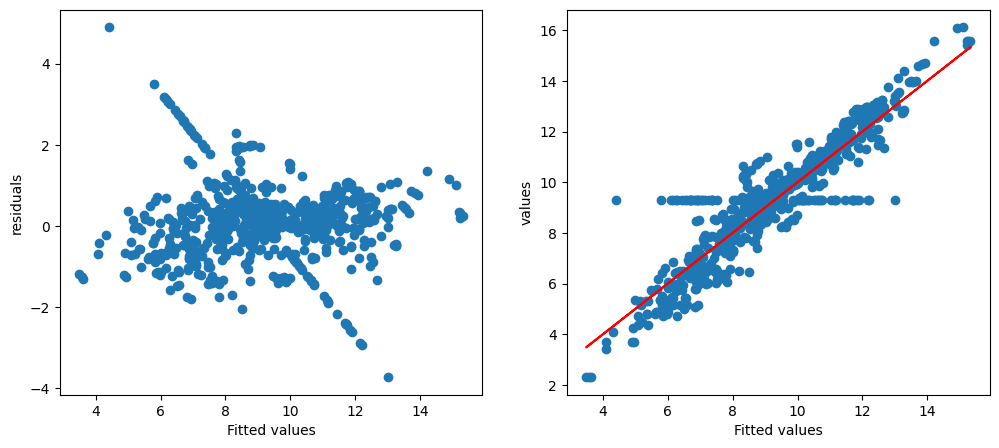

In [468]:
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

#### <span style="color:blue"> **b. Regression Linéaire avec Lasso**  </span>

In [469]:
param=[{"alpha":[0,0.05,0.1,0.2,0.3,50,500,1000,1500]}]
regLasso = GridSearchCV(Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, YTrain)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.849723, Meilleur paramètre = {'alpha': 0}


C:\Users\maymo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\maymo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\maymo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.163e+03, tolerance: 1.581e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers i

In [470]:
# Making predictions on the testing set
y_chap = regLassOpt.predict(Xr_test)

# Calculating mean squared error
mse = mean_squared_error(YTest, prev)
R2=r2_score(YTest,y_chap)

print("MSE =", mse)
print("R2 =",R2)

MSE = 0.7987824607321652
R2 = 0.8455183242695212


<Figure size 640x480 with 0 Axes>

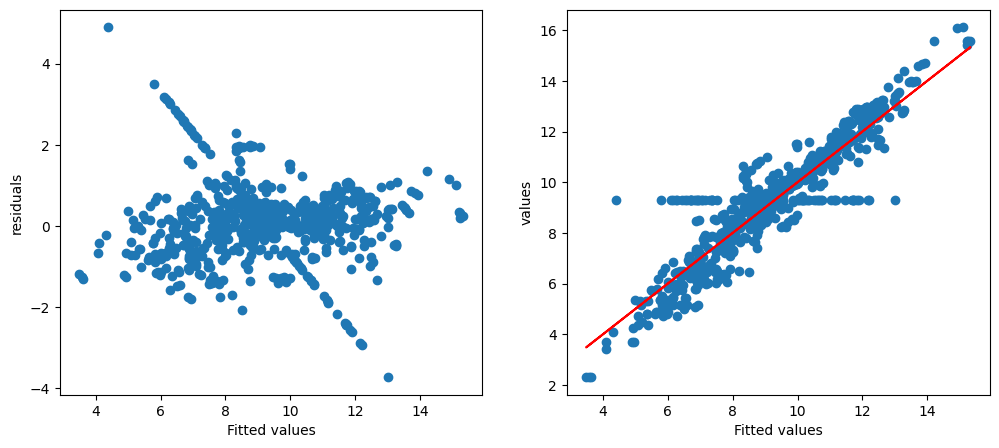

In [471]:
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

#### <span style="color:blue"> **c. SVM**  </span>

In [472]:
inputY=energyQuant_meanImp["Value_co2_emissions_kt_by_country"]
inputX=energyQuant_meanImp.drop(["Value_co2_emissions_kt_by_country"],axis=1)
XTr_svm, XT_svm, YTr_svm, YT_svm = train_test_split(inputX, inputY, test_size=0.2, random_state=11)
scaler.fit(XTr_svm)
Xr_train_svm = scaler.transform(XTr_svm)

Xr_test_svm = scaler.transform(XT_svm)

In [473]:
param = {'degree': [2, 3, 4,5,6]}  # Range of C and degree values to try
svm = GridSearchCV(SVR(epsilon=0.1, kernel='poly'), param_grid=param, cv=10, n_jobs=-1)
svmOpt = svm.fit(Xr_train_svm, YTr_svm)

# Best parameters
print("Best score = %f, Best parameters = %s" % (1. - svmOpt.best_score_, svmOpt.best_params_))

Best score = 0.129912, Best parameters = {'degree': 3}


<Figure size 640x480 with 0 Axes>

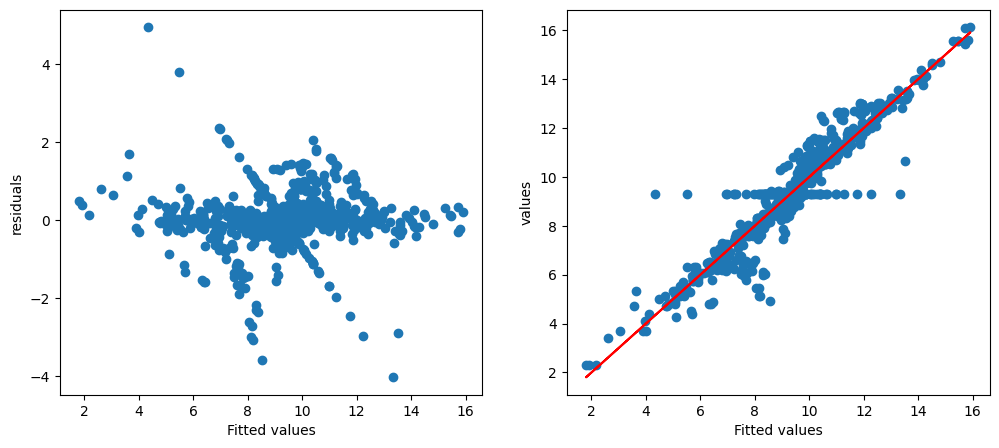

In [474]:
y_chap=svmOpt.predict(Xr_test_svm)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YT_svm-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YT_svm)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

#### <span style="color:blue"> **d. Cart**  </span>

In [475]:
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,18))}]
tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.053298, Meilleur paramètre = {'max_depth': 13}


MSE= 0.12363816311939545


<Figure size 640x480 with 0 Axes>

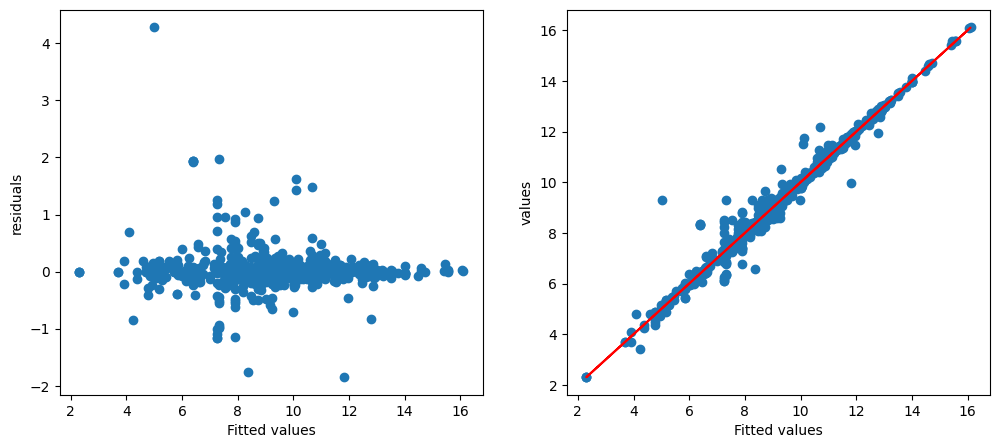

In [476]:
y_chap_= treeOpt.predict(Xr_test)
mse=mean_squared_error(y_chap_,YTest)

print("MSE=",mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap_,YTest-y_chap_)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap_,YTest)
plt.plot(y_chap_,y_chap_,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

#### <span style="color:blue"> **e. Random Forest**  </span>

In [477]:
param=[{"max_features":list(range(2,20,2))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.026100, Meilleur paramètre = {'max_features': 16}


MSE= 0.08547091975792308


<Figure size 640x480 with 0 Axes>

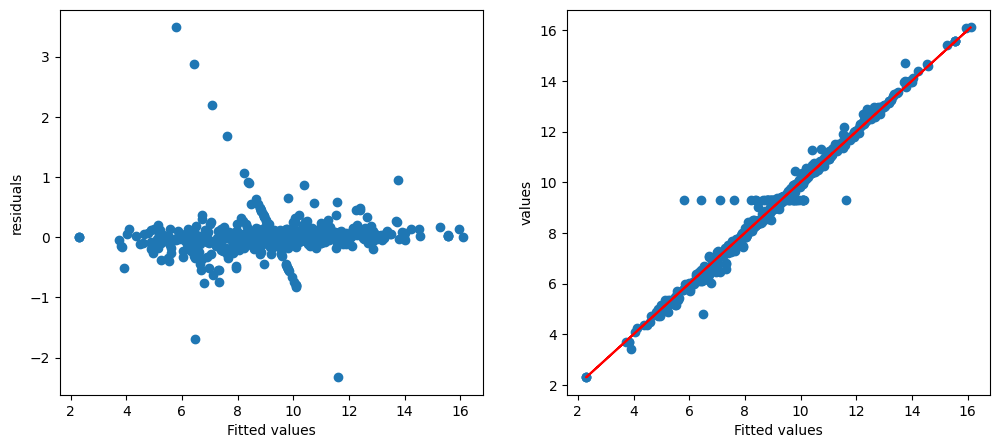

In [478]:
y_chap = rfOpt.predict(Xr_test)
rf_mse=mean_squared_error(y_chap,YTest)
print("MSE=",rf_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

#### <span style="color:blue"> **IV.B.2 Avec la méthode KNN**  </span>

In [479]:
Xr_train,Xr_test,YTrain, YTest=set(energy3,energyQuant_kNNImp)

##### <span style="color:blue"> **a. Regression Linéaire**  </span>

In [480]:
regLin = LinearRegression()
regLin.fit(Xr_train, YTrain)

# Making predictions on the testing set
y_chap = regLin.predict(Xr_test)

# Calculating mean squared error
mse = mean_squared_error(YTest, prev)
R2=r2_score(YTest,prev)

print("MSE =", mse)
print("R2 =",R2)

MSE = 0.8025574995407314
R2 = 0.8658857014502503


<Figure size 640x480 with 0 Axes>

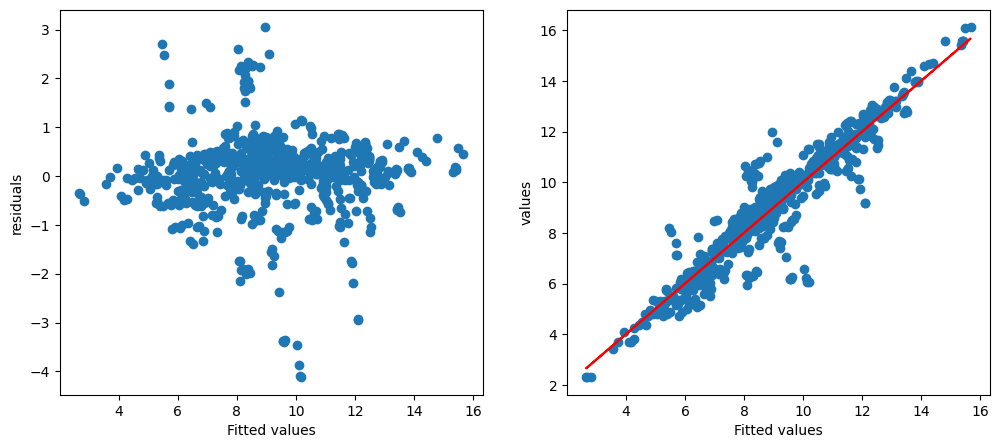

In [481]:
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

##### <span style="color:blue"> **b. Regression Linéaire avec Lasso**  </span>

In [482]:
param=[{"alpha":[0,0.05,0.1,0.2,0.3,50,500,1000,1500]}]
regLasso = GridSearchCV(Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, YTrain)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.910710, Meilleur paramètre = {'alpha': 0}


C:\Users\maymo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\maymo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\maymo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.789e+02, tolerance: 1.776e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers i

In [483]:
# Making predictions on the testing set
y_chap = regLassOpt.predict(Xr_test)

# Calculating mean squared error
mse = mean_squared_error(YTest, prev)
R2=r2_score(YTest,y_chap)

print("MSE =", mse)
print("R2 =",R2)

MSE = 0.8025574995407314
R2 = 0.8983684884565697


<Figure size 640x480 with 0 Axes>

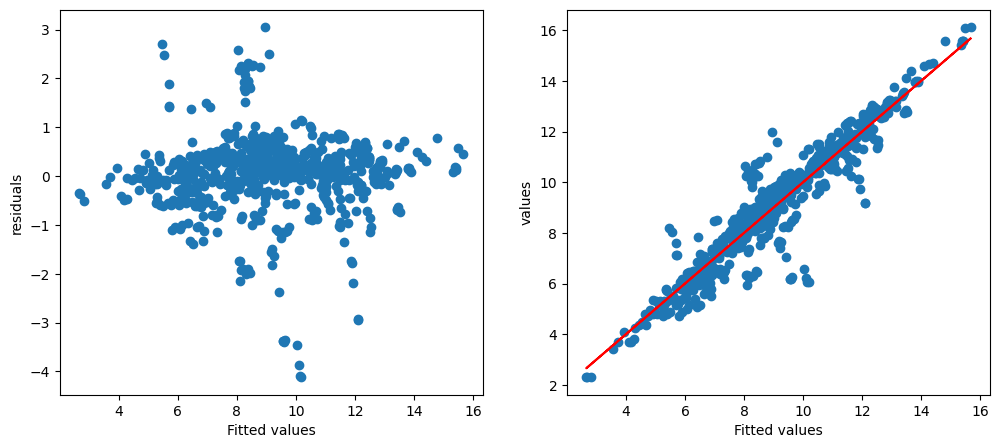

In [484]:
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

##### <span style="color:blue"> **c. SVM**  </span>

In [485]:
# Calculate execution time
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")inputY=energyQuant_kNNImp["Value_co2_emissions_kt_by_country"]
inputX=energyQuant_kNNImp.drop(["Value_co2_emissions_kt_by_country"],axis=1)
XTr_svm, XT_svm, YTr_svm, YT_svm = train_test_split(inputX, inputY, test_size=0.2, random_state=11)
scaler.fit(XTr_svm)
Xr_train_svm = scaler.transform(XTr_svm)

Xr_test_svm = scaler.transform(XT_svm)

Best score = 0.103674, Best parameters = {'degree': 3}


<Figure size 640x480 with 0 Axes>

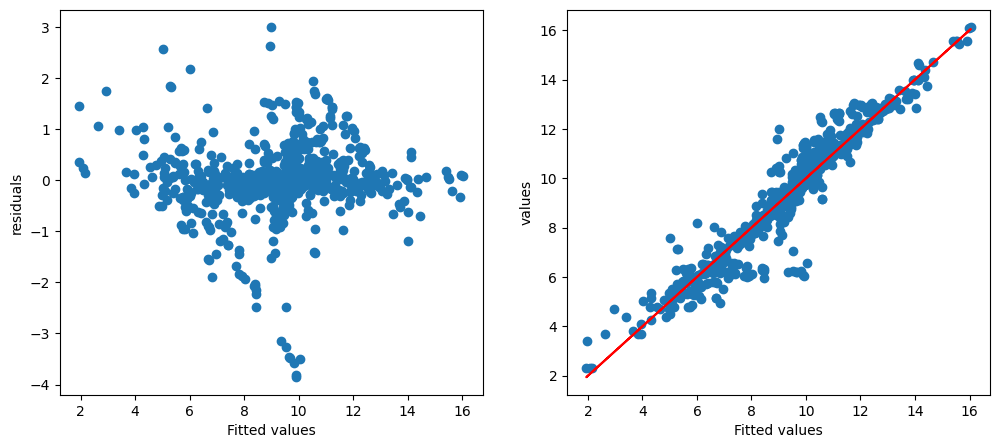

In [486]:
param = {'degree': [2, 3, 4,5,6]}  # Range of C and degree values to try
svm = GridSearchCV(SVR(epsilon=0.1, kernel='poly'), param_grid=param, cv=10, n_jobs=-1)
svmOpt = svm.fit(Xr_train_svm, YTr_svm)

# Best parameters
print("Best score = %f, Best parameters = %s" % (1. - svmOpt.best_score_, svmOpt.best_params_))

y_chap=svmOpt.predict(Xr_test_svm)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YT_svm-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YT_svm)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

##### <span style="color:blue"> **d. CART**  </span>

In [487]:
param=[{"max_depth":list(range(2,18))}]
tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.014391, Meilleur paramètre = {'max_depth': 16}


MSE= 0.19383672884152192


<Figure size 640x480 with 0 Axes>

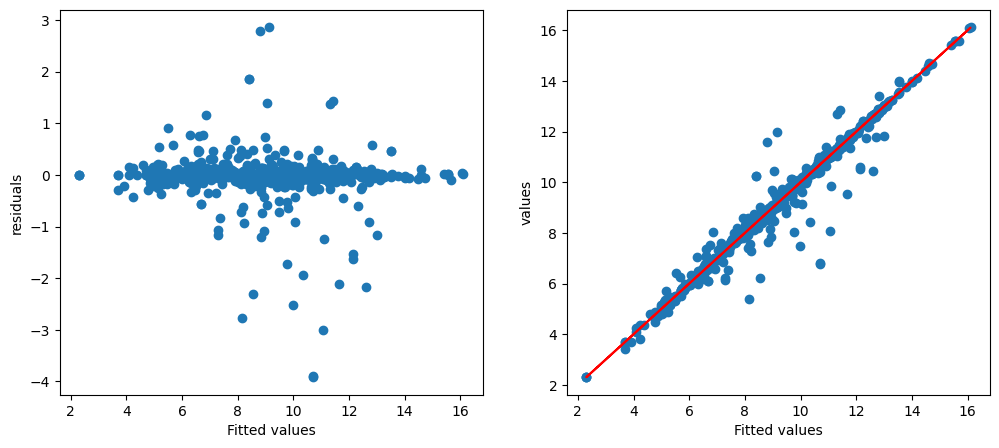

In [488]:
y_chap_= treeOpt.predict(Xr_test)
mse=mean_squared_error(y_chap_,YTest)

print("MSE=",mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap_,YTest-y_chap_)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap_,YTest)
plt.plot(y_chap_,y_chap_,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

##### <span style="color:blue"> **e. Random Forest**  </span>

In [489]:
param=[{"max_features":list(range(2,20,2))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.005952, Meilleur paramètre = {'max_features': 10}


MSE= 0.05002081551433432


<Figure size 640x480 with 0 Axes>

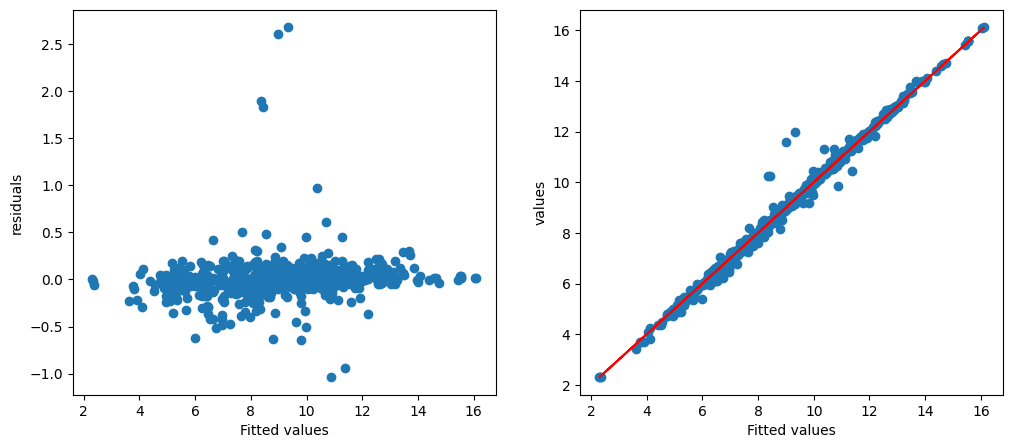

In [490]:
y_chap = rfOpt.predict(Xr_test)
rf_mse=mean_squared_error(y_chap,YTest)
print("MSE=",rf_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

#### <span style="color:blue"> **IV.B.3 Avec la méthode MissForest**  </span>

In [491]:
Xr_train,Xr_test,YTrain, YTest=set(energy3,energyQuant_rfIMp)

##### <span style="color:blue"> **a. Regression Linéaire**  </span>

In [492]:
regLin = LinearRegression()
regLin.fit(Xr_train, YTrain)

# Making predictions on the testing set
y_chap = regLin.predict(Xr_test)

# Calculating mean squared error
mse = mean_squared_error(YTest, prev)
R2=r2_score(YTest,prev)

print("MSE =", mse)
print("R2 =",R2)

MSE = 0.43689279197758785
R2 = 0.9244024466234753


MSE= 0.05002081551433432


<Figure size 640x480 with 0 Axes>

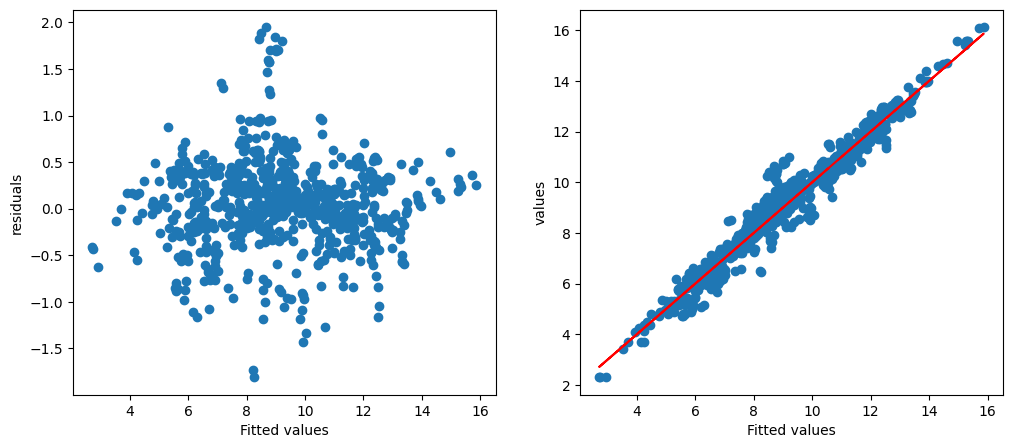

In [493]:
y_chap = regLin.predict(Xr_test)
mse=mean_squared_error(y_chap,YTest)
print("MSE=",rf_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

##### <span style="color:blue"> **a. Regression Linéaire avec Lasso**  </span>

In [494]:
param=[{"alpha":[0,0.05,0.1,0.2,0.3,50,500,1000,1500]}]
regLasso = GridSearchCV(Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, YTrain)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.962108, Meilleur paramètre = {'alpha': 0}


C:\Users\maymo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\maymo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\maymo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.250e+02, tolerance: 1.748e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers i

In [495]:
# Making predictions on the testing set
y_chap = regLassOpt.predict(Xr_test)

# Calculating mean squared error
mse = mean_squared_error(YTest, prev)
R2=r2_score(YTest,y_chap)

print("MSE =", mse)
print("R2 =",R2)

MSE = 0.43689279197758785
R2 = 0.9600135297336171


MSE= 0.05002081551433432


<Figure size 640x480 with 0 Axes>

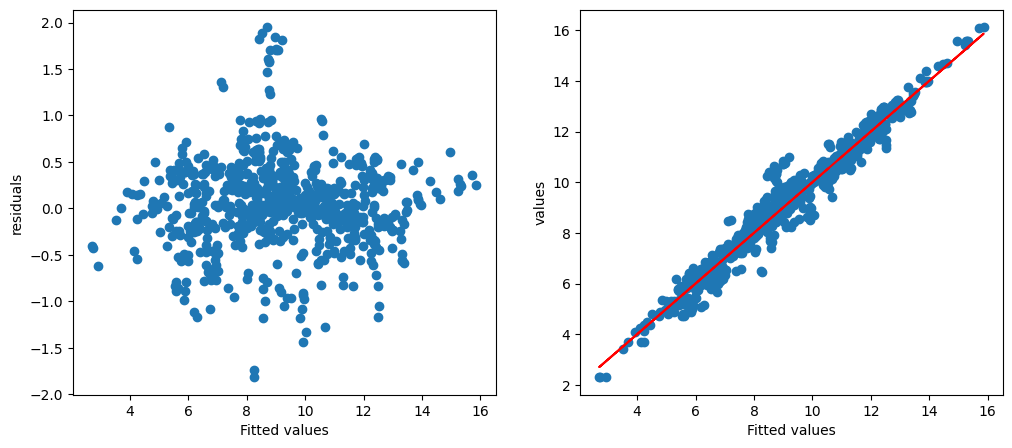

In [496]:
y_chap = regLassOpt.predict(Xr_test)
mse=mean_squared_error(y_chap,YTest)
print("MSE=",rf_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

##### <span style="color:blue"> **c. SVM**  </span>

In [497]:
inputY=energyQuant_rfIMp["Value_co2_emissions_kt_by_country"]
inputX=energyQuant_rfIMp.drop(["Value_co2_emissions_kt_by_country"],axis=1)
XTr_svm, XT_svm, YTr_svm, YT_svm = train_test_split(inputX, inputY, test_size=0.2, random_state=11)
scaler.fit(XTr_svm)
Xr_train_svm = scaler.transform(XTr_svm)

Xr_test_svm = scaler.transform(XT_svm)

In [498]:
param = {'degree': [2, 3, 4,5,6]}  # Range of C and degree values to try
svm = GridSearchCV(SVR(epsilon=0.1, kernel='poly'), param_grid=param, cv=10, n_jobs=-1)
svmOpt = svm.fit(Xr_train_svm, YTr_svm)

# Best parameters
print("Best score = %f, Best parameters = %s" % (1. - svmOpt.best_score_, svmOpt.best_params_))

Best score = 0.076140, Best parameters = {'degree': 3}


<Figure size 640x480 with 0 Axes>

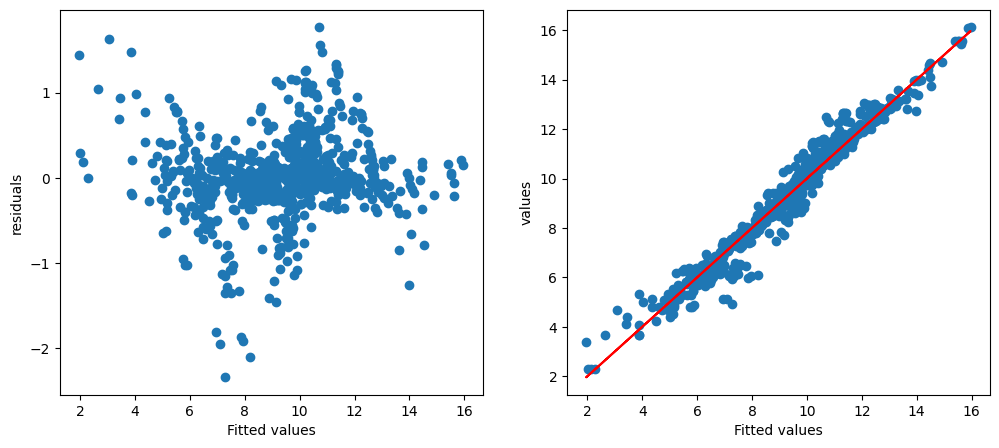

In [499]:
y_chap=svmOpt.predict(Xr_test_svm)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YT_svm-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YT_svm)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

##### <span style="color:blue"> **d. CART**  </span>

In [500]:
param=[{"max_depth":list(range(2,18))}]
tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.011430, Meilleur paramètre = {'max_depth': 15}


MSE= 0.0751891623568592


<Figure size 640x480 with 0 Axes>

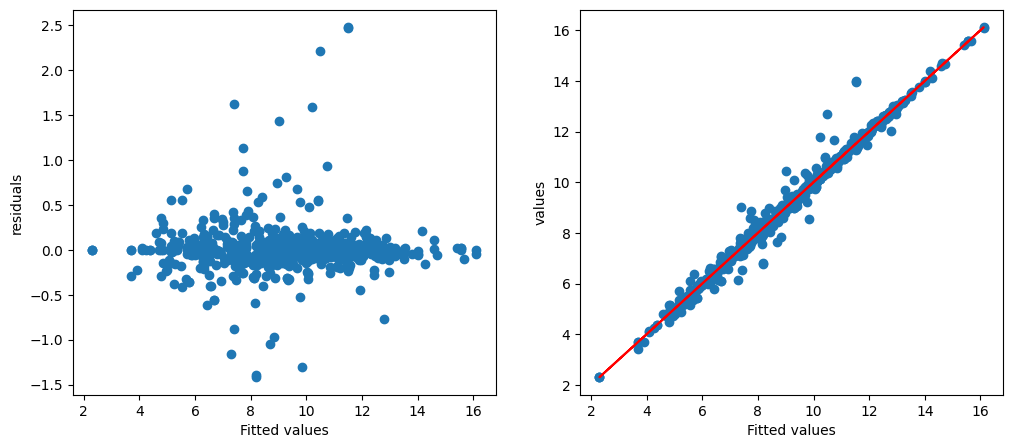

In [501]:
y_chap_= treeOpt.predict(Xr_test)
mse=mean_squared_error(y_chap_,YTest)

print("MSE=",mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap_,YTest-y_chap_)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap_,YTest)
plt.plot(y_chap_,y_chap_,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

##### <span style="color:blue"> **e. Random Forest**  </span>

In [502]:
param=[{"max_features":list(range(2,20,2))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.003172, Meilleur paramètre = {'max_features': 12}


MSE= 0.012369598217231917


<Figure size 640x480 with 0 Axes>

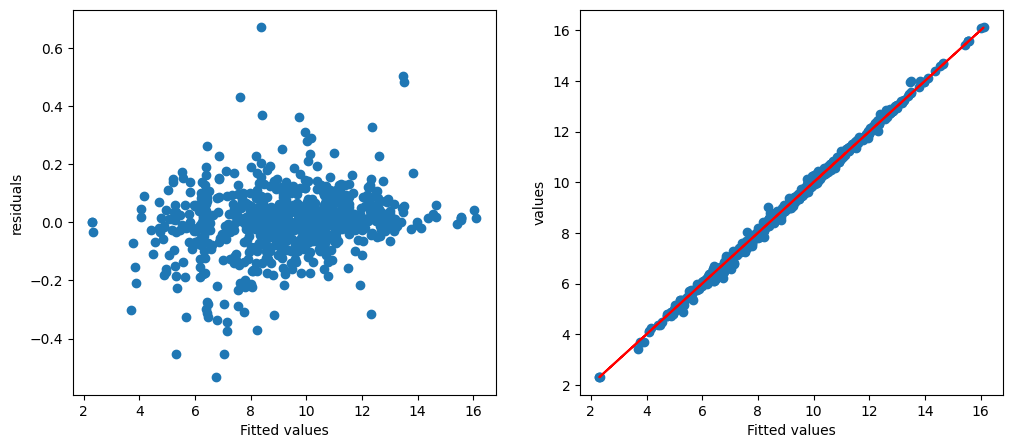

In [503]:
y_chap = rfOpt.predict(Xr_test)
rf_mse=mean_squared_error(y_chap,YTest)
print("MSE=",rf_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')


plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()